This notebook is to compare FeliX projections with the original SSP projections across output indicators.

In [1]:
import sys
sys.path.append(r'C:\Users\moallemie\EMAworkbench-master')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load and process SSP data

In [3]:
directory = 'C:/Users/moallemie/GitHub/Scenario_Modelling/Data/IIASA_SSP_dataset/' 
df_scenario = pd.read_excel(directory+"SSP_Scenarios.xlsx", sheet_name='IIASA SSPs Data')
df_scenario = df_scenario.drop(['2005','2010'], 1)

df_population = pd.read_excel(directory+"SSP_Population.xlsx", sheet_name='SSPs Data Cumulative')
df_population = df_population.drop(['2010', '2015', '2025', '2035', '2045', '2055', '2065', '2075', '2085', '2095'], 1)

df_gdp = pd.read_excel(directory+"SSP_GDP.xlsx", sheet_name='IIASA SSPs Data')
df_gdp = df_gdp.drop(['2010', '2015', '2025', '2035', '2045', '2055', '2065', '2075', '2085', '2095'], 1)

In [4]:
years = ['2020', '2030', '2040', '2050', '2060', '2070', '2080', '2090', '2100']


sc_variables = ['Agricultural Production|Crops|Non-Energy', 
           'Agricultural Production|Livestock', 'Emissions|CO2', 'Energy Demand Indicator', 
           'Land Cover|Cropland', 'Land Cover|Forest', 'Land Cover|Pasture', 
           'Primary Energy|Biomass', 'Primary Energy|Coal', 'Primary Energy|Gas', 'Primary Energy|Oil', 
           'Primary Energy|Solar', 'Primary Energy|Wind', 'Final Energy', 'Diagnostics|MAGICC6|Forcing|CO2'] 

pop_variables = ['Population', 'Population Primary Education', 'Population Secondary Education', 'Population Tertiary Education']

gdp_variables = df_gdp['VARIABLE'].unique().tolist()

scenarios = ['SSP1-26', 'SSP2-45', 'SSP3-70', 'SSP4-60', 'SSP5-85']


regions = ['World']


sc_models = ['AIM/CGE', 'GCAM4', 'IMAGE', 'MESSAGE-GLOBIOM', 'REMIND-MAGPIE',
       'WITCH-GLOBIOM']

pop_models = df_population['MODEL'].unique().tolist()

gdp_models = df_gdp['MODEL'].unique().tolist()

In [51]:
dict_var = {}

for v, var in enumerate(sc_variables):
    dict_var[var] = {}
    for s, scenario in enumerate(scenarios):
        df_sc = df_scenario[(df_scenario['SCENARIO'] == scenario) & (df_scenario['REGION'] == 'World') 
                            & (df_scenario['VARIABLE'] == var)]
        df_sc = df_sc.T
        df_sc.reset_index(level=0, inplace=True)
        df_sc.columns = df_sc.iloc[0]
        df_sc2 = df_sc.drop([0,1,2,3,4])
        df_sc3 = df_sc2.rename(columns={"MODEL": "Time"})
        df_sc3['Time'] = df_sc3['Time'].astype(int)
        dict_var[var][scenario] = df_sc3

for v, var in enumerate(pop_variables):
    dict_var[var] = {}
    for s, scenario in enumerate(scenarios):
        df_sc = df_population[(df_population['SCENARIO'] == scenario) & (df_population['REGION'] == 'World') 
                            & (df_population['VARIABLE'] == var)]
        df_sc = df_sc.T
        df_sc.reset_index(level=0, inplace=True)
        df_sc.columns = df_sc.iloc[0]
        df_sc2 = df_sc.drop([0,1,2,3,4])
        df_sc3 = df_sc2.rename(columns={"MODEL": "Time"})
        df_sc3['Time'] = df_sc3['Time'].astype(int)
        dict_var[var][scenario] = df_sc3
    
for v, var in enumerate(gdp_variables):
    dict_var[var] = {}
    for s, scenario in enumerate(scenarios):
        df_sc = df_gdp[(df_gdp['SCENARIO'] == scenario) & (df_gdp['REGION'] == 'World') 
                            & (df_gdp['VARIABLE'] == var)]
        df_sc = df_sc.T
        df_sc.reset_index(level=0, inplace=True)
        df_sc.columns = df_sc.iloc[0]
        df_sc2 = df_sc.drop([0,1,2,3,4])
        df_sc3 = df_sc2.rename(columns={"MODEL": "Time"})
        df_sc3['Time'] = df_sc3['Time'].astype(int)
        dict_var[var][scenario] = df_sc3
        

        
old_keys = ['Agricultural Production|Crops|Non-Energy', 
                      'Agricultural Production|Livestock', 
                      'Emissions|CO2', 
                      'Land Cover|Cropland', 
                      'Land Cover|Forest', 
                      'Land Cover|Pasture', 
                      'Primary Energy|Biomass', 
                      'Primary Energy|Coal', 
                      'Primary Energy|Gas', 
                      'Primary Energy|Oil', 
                      'Primary Energy|Solar', 
                      'Primary Energy|Wind', 
                      'Diagnostics|MAGICC6|Forcing|CO2',
                      'Population',
                      'Population Primary Education',
                      'Population Secondary Education',
                      'Population Tertiary Education', 
                      'GDP|PPP per capita', 
            'Final Energy']
new_keys = ['Nonenergy Crops Production Indicator', 
                      'Livestock Production Indicator', 
                     'Total CO2 Emissions Indicator', 
                      'Total Croplands Indicator', 
                     'Forest Land Indicator', 
                      'Pasture Land Indicator', 
                      'Biomass Energy Production Indicator', 
                      'Coal Production Indicator', 
                      'Gas Production Indicator', 
                      'Oil Production Indicator', 
                      'Solar Energy Production Indicator', 
                      'Wind Energy Production Indicator', 
                      'CO2 Radiative Forcing Indicator',
                      'Total Population Indicator',
                      'Total Primary Education Graduates Indicator',
                     'Total Secondary Education Graduates Indicator',
                      'Total Tertiary Education Graduates Indicator', 
                      'GWP per Capita Indicator', 
            'Energy Demand Indicator']

for new_key, old_key in zip(new_keys, old_keys):
    dict_var[new_key] = dict_var.pop(old_key)
    
        
# This is to convert population size from million to billion.
cols = ['IIASA GDP','OECD Env-Growth','PIK GDP-32', 'NCAR', 'IIASA-WiC POP']
for s, sc in enumerate(scenarios): 
    dict_var['Total Population Indicator'][sc].loc[:,cols] = dict_var['Total Population Indicator'][sc].loc[:, cols].div(1000, axis=0)


In [52]:
dict_var['Total Population Indicator']['SSP1-26']

0   Time IIASA GDP OECD Env-Growth PIK GDP-32     NCAR IIASA-WiC POP
5   2020   7.35405         7.49411    7.54332   7.5175        7.5185
6   2030   7.81892          7.9758     8.0244  7.99883       7.99991
7   2040   8.12895         8.30044    8.34543  8.32091       8.32206
8   2050   8.25959         8.44211    8.48077  8.45821        8.4594
9   2060   8.21604         8.40546    8.43631  8.41621       8.41742
10  2070   8.02251         8.21505    8.23821  8.22025       8.22144
11  2080   7.69568         7.88736    7.90354  7.88737       7.88853
12  2090   7.24789          7.4351    7.44506  7.43042       7.43153
13  2100   6.70802         6.88807    6.89221  6.87891       6.87993

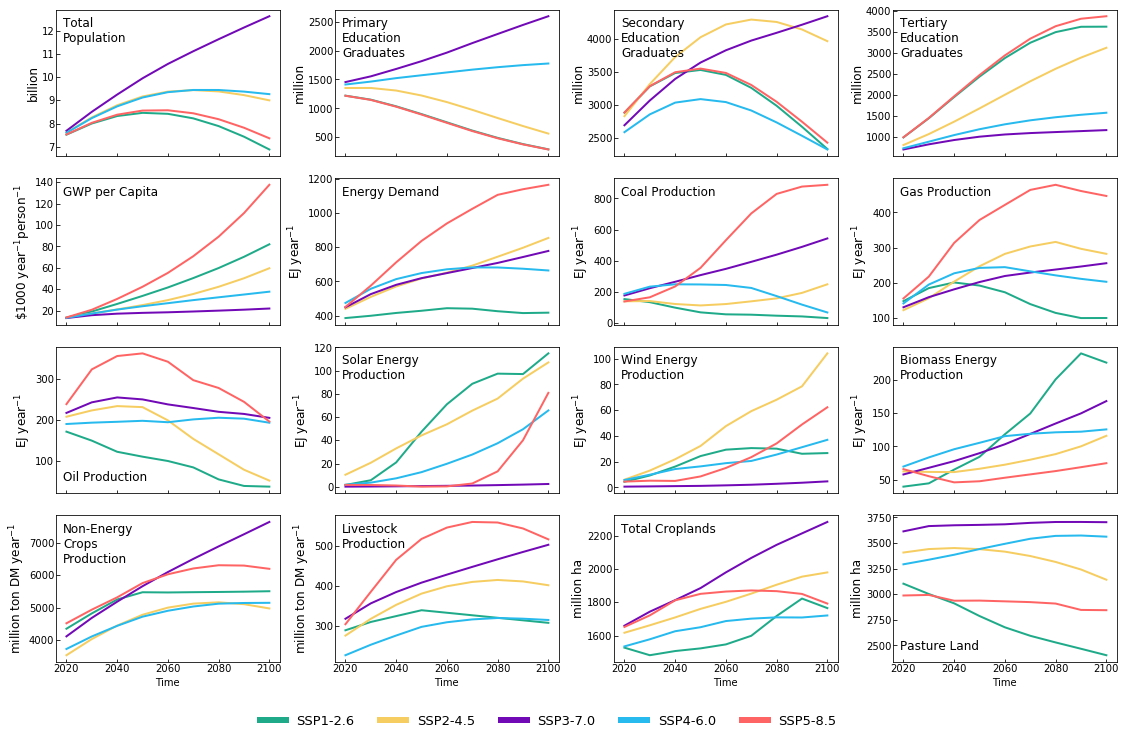

In [53]:
# Develop plots for the refernce values of energy demand and food production to use in the calibration section of SI.

from textwrap import wrap
from matplotlib.lines import Line2D

  
# Customise y-axis label names to include the units. 
y_labels = {'Total Population Indicator':'billion', 
             'Total Primary Education Graduates Indicator':'million',
             'Total Secondary Education Graduates Indicator':'million',
              'Total Tertiary Education Graduates Indicator':'million', 
              'GWP per Capita Indicator':'\$1000 $\mathregular{year^{-1} person^{-1}}$',
             'Energy Demand Indicator': 'EJ $\mathregular{year^{-1}}$',
             'Coal Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Gas Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Oil Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Solar Energy Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Wind Energy Production Indicator':'EJ $\mathregular{year^{-1}}$', 
            'Biomass Energy Production Indicator':'EJ $\mathregular{year^{-1}}$',
             'Nonenergy Crops Production Indicator':'million ton DM $\mathregular{year^{-1}}$', 
              'Livestock Production Indicator':'million ton DM $\mathregular{year^{-1}}$',  
              'Total Croplands Indicator':'million ha', 
              'Pasture Land Indicator':'million ha'}

marker_model = {'SSP1-26': 'IMAGE','SSP2-45':'MESSAGE-GLOBIOM','SSP3-70':'AIM/CGE', 
                'SSP4-60':'GCAM4', 'SSP5-85':'REMIND-MAGPIE'}
marker_org = {'Total Population Indicator':'IIASA-WiC POP', 
             'Total Primary Education Graduates Indicator':'IIASA-WiC POP',
             'Total Secondary Education Graduates Indicator':'IIASA-WiC POP',
              'Total Tertiary Education Graduates Indicator':'IIASA-WiC POP', 
              'GWP per Capita Indicator':'OECD Env-Growth'}

ssp_names = {'SSP1-26': 'SSP1-2.6', 'SSP2-45': 'SSP2-4.5', 
             'SSP3-70': 'SSP3-7.0', 'SSP4-60': 'SSP4-6.0', 'SSP5-85': 'SSP5-8.5'}


# Customise plot titles
titles = {'Total Population Indicator':'Total Population', 
             'Total Primary Education Graduates Indicator':'Primary Education Graduates',
             'Total Secondary Education Graduates Indicator':'Secondary Education Graduates',
              'Total Tertiary Education Graduates Indicator':'Tertiary Education Graduates', 
              'GWP per Capita Indicator':'GWP per Capita',
             'Energy Demand Indicator': 'Energy Demand',
             'Coal Production Indicator':'Coal Production', 
              'Gas Production Indicator':'Gas Production', 
              'Oil Production Indicator':'Oil Production', 
              'Solar Energy Production Indicator':'Solar Energy Production', 
              'Wind Energy Production Indicator':'Wind Energy Production', 
            'Biomass Energy Production Indicator':'Biomass Energy Production',
             'Nonenergy Crops Production Indicator':'Non-energy Crop Production', 
              'Livestock Production Indicator':'Livestock Production',  
              'Total Croplands Indicator':'Total Croplands', 
              'Pasture Land Indicator':'Pasture Land'}

 
sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#7209b7', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}

fig, axes = plt.subplots(4, 4, figsize=(19, 12), sharex='col')
fig.subplots_adjust(hspace=0.15, wspace=0.25)

j = 0
i = 0
for v, var in enumerate(list(y_labels.keys())):
    if j == 4:
        i += 1
        j = 0
    for s, sc in enumerate(scenarios):

        if var in list(marker_org.keys()):
            dict_var[var][sc].plot( 'Time', marker_org[var], ax=axes[i,j], marker='',
                                                         color=sc_colors[sc], linewidth=2)
        else:
            dict_var[var][sc].plot( 'Time', marker_model[sc], ax=axes[i,j], marker='',
                                                         color=sc_colors[sc], linewidth=2)
    axes[i,j].legend().set_visible(False)
    axes[i,j].set_ylabel(y_labels[var], size=12, labelpad=2)
    
    if var in ['Oil Production Indicator','Pasture Land Indicator']:
        y = .15
    else:
        y = .95
        
    axes[i,j].annotate('\n'.join(wrap(titles[var], 15)), size= 12, xy=(0.03, y), 
                       xycoords='axes fraction', ha='left', va='top')
    axes[i,j].tick_params(axis='both', direction='in', pad=2)
    j += 1

# Create a single legend for all subplots
legend_elements = [Line2D([0], [0], color=sc_colors[sc], lw=6, alpha=1, label=ssp_names[sc]) for sc in scenarios]

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles=legend_elements, loc='upper left', ncol=5, fontsize=13, 
           bbox_to_anchor=(0.27, 0.07), frameon=False, borderaxespad=0, bbox_transform=fig.transFigure)

plt.savefig('{}/SSPs_assumption_EF_300dpi.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=300,  bbox_inches='tight') 
plt.savefig('{}/SSPs_assumption_EF.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 


## Load FeliX projections (experiments)

In [54]:
# Import Felix model generated projections under uncertainty to show bands instead of lines. 
from ema_workbench import load_results
directory = 'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Results/Exploration_results/'
dict_sc_felix = {}
dict_sc_felix_g = {}
for i in scenarios:  
    results = load_results(directory+'SDG_{}_exploration_sc10000.tar.gz'.format(i))
    experiments, outcomes = results
    dict_sc_felix[i] = outcomes # for all plotting except changes needed under green growth 
    dict_sc_felix_g[i] = outcomes # for plotting changes needed under the green growth

In [56]:
dict_sc_felix_g['SSP1-26']

{'TIME': array([[1900., 1901., 1902., ..., 2098., 2099., 2100.],
        [1900., 1901., 1902., ..., 2098., 2099., 2100.],
        [1900., 1901., 1902., ..., 2098., 2099., 2100.],
        ...,
        [1900., 1901., 1902., ..., 2098., 2099., 2100.],
        [1900., 1901., 1902., ..., 2098., 2099., 2100.],
        [1900., 1901., 1902., ..., 2098., 2099., 2100.]]),
 'Cereal Yield': array([[ 0.65634   ,  0.68569094,  0.7188353 , ..., 11.188534  ,
         11.24396   , 11.299251  ],
        [ 0.65634   ,  0.68569094,  0.7188353 , ..., 10.450304  ,
         10.496298  , 10.542251  ],
        [ 0.65634   ,  0.68569094,  0.7188353 , ..., 11.716425  ,
         11.776306  , 11.836038  ],
        ...,
        [ 0.65634   ,  0.68569094,  0.7188353 , ..., 11.33598   ,
         11.393381  , 11.450654  ],
        [ 0.65634   ,  0.68569094,  0.7188353 , ..., 10.994808  ,
         11.04513   , 11.095323  ],
        [ 0.65634   ,  0.68569094,  0.7188353 , ..., 11.277934  ,
         11.3351965 , 11.39231

## Plot FeliX vs other IAM projections (main text)

In [60]:
outcomes_dict = {}
for i in scenarios:
    # Delete other output indicators and keep only those used for SSP calibration. We do not plot 'Urban Industrial Land Indicator' for calibration. 
    unwanted = set(list(dict_sc_felix[i].keys())) - set(new_keys+['TIME'])
    for unwanted_key in unwanted: del dict_sc_felix[i][unwanted_key]
        
    # Flatten 2D arrays in outcomes[indicator] to 1D array and create a long-format dataframe for plotting the uncertainty
    # Why we convert outcomes to long-format dataframe? because it's the accepted format of sns.lineplot which draws uncertainty
    outcomes_df = pd.DataFrame(columns=list(dict_sc_felix[i].keys()))
    for key in set(list(dict_sc_felix[i].keys())): 
        outcomes_df[key] = dict_sc_felix[i][key][:, 120:].ravel() # Specify from when to plot the data 
    outcomes_dict[i] = outcomes_df
    
    # To convert population size from million to billion
    outcomes_dict[i]['Total Population Indicator'] = outcomes_dict[i]['Total Population Indicator'].div(1000, axis=0)

In [91]:
outcomes_dict['SSP3-70']

TIME  Pasture Land Indicator  Total Croplands Indicator  \
0       2020.0               3288.9866                  1608.6915   
1       2021.0               3295.2102                  1611.7356   
2       2022.0               3301.8420                  1614.9794   
3       2023.0               3309.0550                  1618.5072   
4       2024.0               3316.8560                  1622.3228   
...        ...                     ...                        ...   
809995  2096.0               3528.3800                  1725.7823   
809996  2097.0               3524.4749                  1723.8723   
809997  2098.0               3520.4033                  1721.8809   
809998  2099.0               3516.1680                  1719.8093   
809999  2100.0               3511.7717                  1717.6590   

        Solar Energy Production Indicator  Wind Energy Production Indicator  \
0                                3.662561                          1.228425   
1                                3.983125                          2.037790   
2                                4.293693                          2.820055   
3                                4.582071                          3.553775   
4                                4.837855                          4.226285   
...                                   ...                               ...   
809995                           2.500619                          3.327841   
809996                           2.563819                          3.433641   
809997                           2.628484                          3.543107   
809998                           2.694338                          3.655857   
809999                           2.761099                          3.771504   

        Biomass Energy Production Indicator  Oil Production Indicator  \
0                                 25.585926                 196.97820   
1                                 26.051361                 198.19579   
2                                 26.493422                 199.14417   
3                                 26.938654                 200.04572   
4                                 27.396536                 201.09448   
...                                     ...                       ...   
809995                            72.471565                 140.83961   
809996                            75.890015                 139.47513   
809997                            79.503390                 138.12369   
809998                            83.312330                 136.78354   
809999                            87.316300                 135.45291   

        Gas Production Indicator  Coal Production Indicator  \
0                      169.93490                  144.71630   
1                      174.81699                  146.93730   
2                      179.39243                  149.21196   
3                      179.32590                  151.31133   
4                      178.42632                  153.05870   
...                          ...                        ...   
809995                 201.38148                  298.35663   
809996                 203.21053                  293.95816   
809997                 205.01067                  289.37476   
809998                 206.77129                  284.62524   
809999                 208.45181                  279.72888   

        Forest Land Indicator  ...  GWP per Capita Indicator  \
0                   3960.9194  ...                 11.963818   
1                   3951.4343  ...                 11.948673   
2                   3941.3582  ...                 11.943927   
3                   3930.4412  ...                 11.947535   
4                   3918.6729  ...                 11.959305   
...                       ...  ...                       ...   
809995              3522.5396  ...                 24.080229   
809996              3524.9880  ...                 24.333970   
809997              35

In [100]:
# Prapre the datasets for plotting FeliX projections against SSP model projections

from textwrap import wrap
from collections import OrderedDict
from matplotlib.lines import Line2D
import matplotlib as mpl


# Combine FeliX projections across all renewable sources, all fossil sources,  all food production, and all agricultural land
renewable = ['Solar Energy Production Indicator', 'Wind Energy Production Indicator', 'Biomass Energy Production Indicator']
fossil = ['Oil Production Indicator', 'Gas Production Indicator', 'Coal Production Indicator']
food = ['Nonenergy Crops Production Indicator', 'Livestock Production Indicator']
agriland = ['Total Croplands Indicator', 'Pasture Land Indicator']

for s in scenarios:
    outcomes_dict[s]['Renewable Energy Production Indicator'] = outcomes_dict[s][renewable].sum(axis=1)
    outcomes_dict[s]['Fossil Energy Production Indicator'] = outcomes_dict[s][fossil].sum(axis=1)
    outcomes_dict[s]['Food Production Indicator'] = outcomes_dict[s][food].sum(axis=1)
    outcomes_dict[s]['Agricultural Lands Indicator'] = outcomes_dict[s][agriland].sum(axis=1)

    
    
# Combine SSP model projections across all renewable sources, all fossil sources,  all food production, and all agricultural land
new_var = ['Renewable Energy Production Indicator', 'Fossil Energy Production Indicator', 
          'Food Production Indicator', 'Agricultural Lands Indicator']
for v in new_var:
    dict_var[v] = {}
for s in scenarios:
    dict_var[new_var[0]][s] = (dict_var['Solar Energy Production Indicator'][s] 
                                                            + dict_var['Wind Energy Production Indicator'][s] 
                                                            + dict_var['Biomass Energy Production Indicator'][s])
    dict_var[new_var[0]][s]['Time'] = dict_var[new_var[0]][s]['Time']/3
    
    dict_var[new_var[1]][s] = (dict_var['Coal Production Indicator'][s] 
                                                            + dict_var['Gas Production Indicator'][s] 
                                                            + dict_var['Oil Production Indicator'][s])
    dict_var[new_var[1]][s]['Time'] = dict_var[new_var[1]][s]['Time']/3
    dict_var[new_var[2]][s] = (dict_var['Nonenergy Crops Production Indicator'][s] 
                                                            + dict_var['Livestock Production Indicator'][s] )
    dict_var[new_var[2]][s]['Time'] = dict_var[new_var[2]][s]['Time']/2
    dict_var[new_var[3]][s] = (dict_var['Total Croplands Indicator'][s] 
                                                            + dict_var['Pasture Land Indicator'][s])
    dict_var[new_var[3]][s]['Time'] = dict_var[new_var[3]][s]['Time']/2

        

# Create subplots title, colours, and units.
ssp_names = {'SSP1-26': 'Green recovery (SSP 1)', 'SSP2-45': 'Business as usual (SSP 2)', 
             'SSP3-70': 'Fragmented world (SSP 3)', 'SSP4-60': 'Inequality (SSP 4)', 'SSP5-85': 'Fossil-fueled development (SSP 5)'}

sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#7209b7', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}

unit_keys = {'Total Population Indicator':'billion', 
             'Total Primary Education Graduates Indicator':'million',
             'Total Secondary Education Graduates Indicator':'million',
              'Total Tertiary Education Graduates Indicator':'million', 
              'GWP per Capita Indicator':'\$1000 $\mathregular{year^{-1} person^{-1}}$',
             'Renewable Energy Production Indicator':'EJ $\mathregular{year^{-1}}$', 
             'Fossil Energy Production Indicator':'EJ $\mathregular{year^{-1}}$',
             'Energy Demand Indicator': 'EJ $\mathregular{year^{-1}}$',
             'Coal Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Gas Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Oil Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Solar Energy Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Wind Energy Production Indicator':'EJ $\mathregular{year^{-1}}$', 
            'Biomass Energy Production Indicator':'EJ $\mathregular{year^{-1}}$',
             'Food Production Indicator':'million ton DM $\mathregular{year^{-1}}$',
             'Nonenergy Crops Production Indicator':'million ton DM $\mathregular{year^{-1}}$', 
              'Livestock Production Indicator':'million ton DM $\mathregular{year^{-1}}$',  
             'Agricultural Lands Indicator':'million ha', 
             'Total Croplands Indicator':'million ha', 
             'Forest Land Indicator':'million ha', 
              'Pasture Land Indicator':'million ha', 
              'CO2 Radiative Forcing Indicator': 'W $\mathregular{m^{-2}}$',
             'Total CO2 Emissions Indicator': 'Gt CO2 $\mathregular{year^{-1}}$'}


title_keys = {'Total Population Indicator':'Total Population', 
             'Total Primary Education Graduates Indicator':'Primary Education Graduates',
             'Total Secondary Education Graduates Indicator':'Secondary Education Graduates',
              'Total Tertiary Education Graduates Indicator':'Tertiary Education Graduates', 
              'GWP per Capita Indicator':'GWP per Capita',
             'Renewable Energy Production Indicator':'Total Renewable Energy Production', 
             'Fossil Energy Production Indicator':'Total Fossil Energy Production', 
              'Energy Demand Indicator': 'Energy Demand',
             'Coal Production Indicator':'Coal Energy Production', 
              'Gas Production Indicator':'Gas Energy Production', 
              'Oil Production Indicator':'Oil Energy Production', 
              'Solar Energy Production Indicator':'Solar Energy Production', 
              'Wind Energy Production Indicator':'Wind Energy Production', 
            'Biomass Energy Production Indicator':'Biomass Energy Production',
             'Food Production Indicator':'Total Food Production',
              'Nonenergy Crops Production Indicator':'Non-energy Crop Production', 
              'Livestock Production Indicator':'Livestock Production',  
              'Agricultural Lands Indicator':'Total Agricultural Land Area',
              'Total Croplands Indicator':'Cropland Area', 
             'Forest Land Indicator':'Forest Land Cover', 
              'Pasture Land Indicator':'Pasture Land Cover', 
              'CO2 Radiative Forcing Indicator': 'Radiative Forcing from $\mathregular{CO_{2}}$',
             'Total CO2 Emissions Indicator': 'Total $\mathregular{CO_{2}}$ Emissions'}

sector_key = {'Total Population Indicator':'SE', 
             'Total Primary Education Graduates Indicator':'SE',
             'Total Secondary Education Graduates Indicator':'SE',
              'Total Tertiary Education Graduates Indicator':'SE', 
              'GWP per Capita Indicator':'SE',
             'Renewable Energy Production Indicator':'E', 
             'Fossil Energy Production Indicator':'E', 
              'Energy Demand Indicator': 'E',
             'Coal Production Indicator':'E', 
              'Gas Production Indicator':'E', 
              'Oil Production Indicator':'E', 
              'Solar Energy Production Indicator':'E', 
              'Wind Energy Production Indicator':'E', 
            'Biomass Energy Production Indicator':'E',
             'Food Production Indicator':'L&F',
              'Nonenergy Crops Production Indicator':'L&F', 
              'Livestock Production Indicator':'L&F',  
              'Agricultural Lands Indicator':'L&F',
              'Total Croplands Indicator':'L&F', 
             'Forest Land Indicator':'L&F', 
              'Pasture Land Indicator':'L&F', 
              'CO2 Radiative Forcing Indicator': 'C',
             'Total CO2 Emissions Indicator': 'C'}

label_key = {'Total Population Indicator':'s', 
             'Total Primary Education Graduates Indicator':'s',
             'Total Secondary Education Graduates Indicator':'s',
              'Total Tertiary Education Graduates Indicator':'s', 
              'GWP per Capita Indicator':'s',
             'Renewable Energy Production Indicator':'e', 
             'Fossil Energy Production Indicator':'e', 
              'Energy Demand Indicator': 'e',
             'Coal Production Indicator':'e', 
              'Gas Production Indicator':'e', 
              'Oil Production Indicator':'e', 
              'Solar Energy Production Indicator':'e', 
              'Wind Energy Production Indicator':'e', 
            'Biomass Energy Production Indicator':'e',
             'Food Production Indicator':'l',
              'Nonenergy Crops Production Indicator':'l', 
              'Livestock Production Indicator':'l',  
              'Agricultural Lands Indicator':'l',
              'Total Croplands Indicator':'l', 
             'Forest Land Indicator':'l', 
              'Pasture Land Indicator':'l', 
              'CO2 Radiative Forcing Indicator': 'c',
             'Total CO2 Emissions Indicator': 'c'}


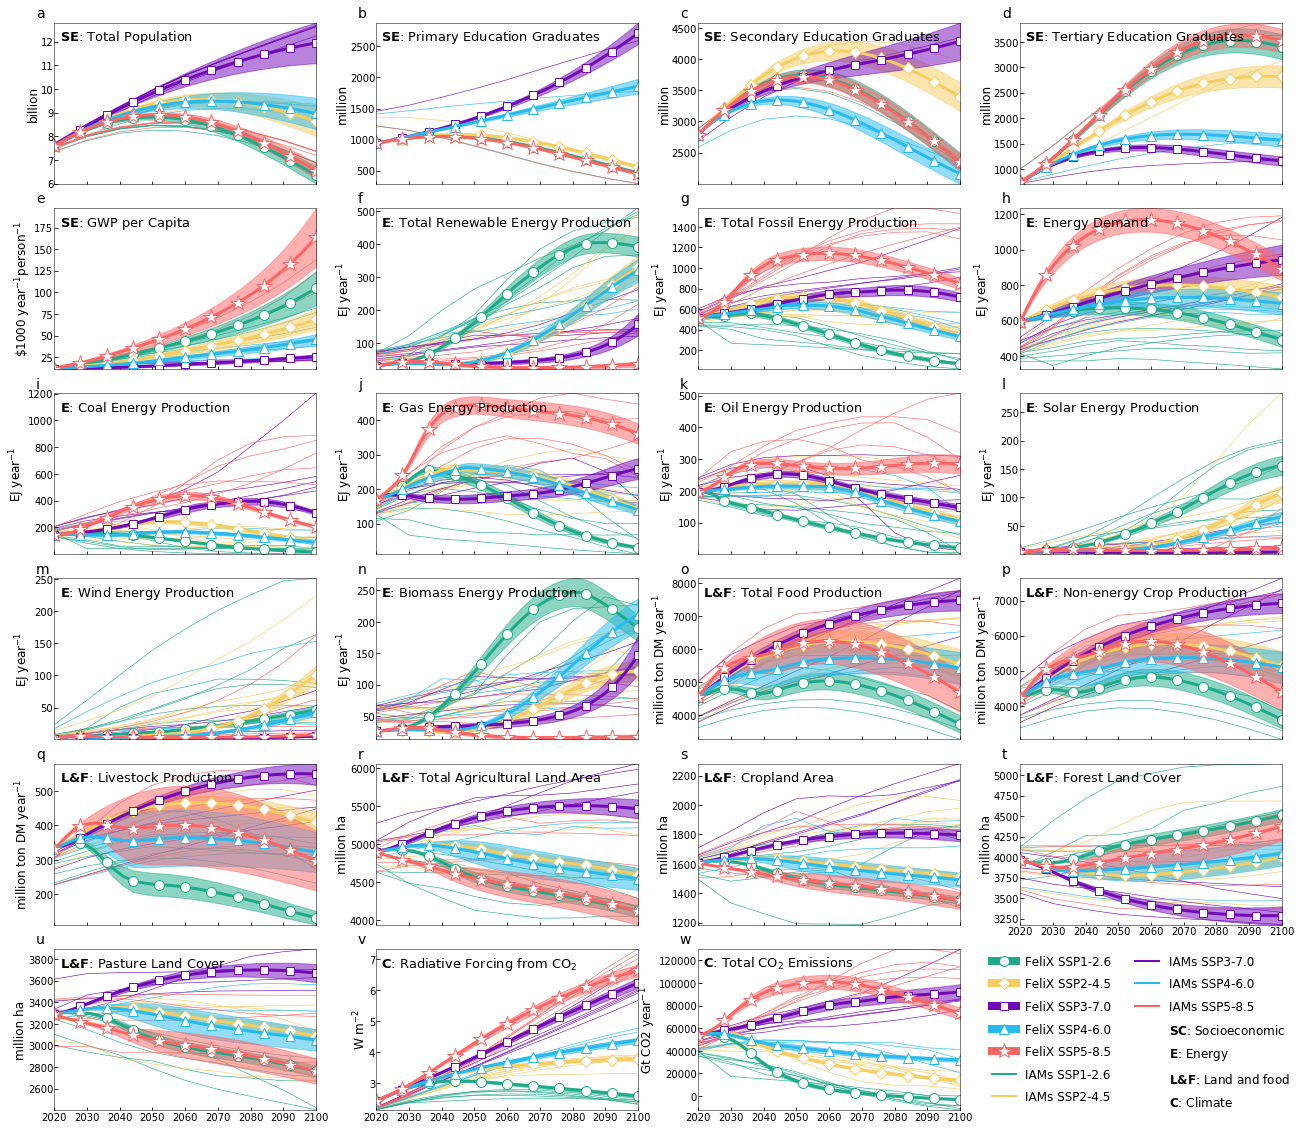

In [103]:
# Develop the  summary calibration plots 

import string

fig = plt.figure(figsize=(22, 20))

# The plots will be in n column and am number of rows, depending on the number of indicators
fig_rows = 6
fig_cols = 4

# Set the width ratio of subplots
grid = plt.GridSpec(fig_rows, fig_cols, hspace=0.15, wspace=0.23, width_ratios=[1,1,1,1])

ax = {}

# Create the reference axes for subplots.
for i in range(fig_rows):
    for j in range(fig_cols):
        ax[i,j] = fig.add_subplot(grid[i, j])
        ax[i,j].tick_params(axis='y', direction='in', pad=1, labelsize=10)
        if (i == 5) and (j in [0,1,2,3]):
            lb = True
        elif (i == 4) and (j == 3):
            lb = True
        else:
            lb = False
        ax[i,j].tick_params(axis='x', direction='in', pad=2, labelbottom=lb, labelsize=10)
ax[5,3].axis('off')
        
'''# Create axes for 
ax[0,0] = fig.add_subplot(grid[0:3,0])
ax[1,0] = fig.add_subplot(grid[3:7,0])
ax[2,0] = fig.add_subplot(grid[7:10,0])
ax[3,0] = fig.add_subplot(grid[10:13,0])'''

    

#sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#d1478c', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}

# Marker dictionary: the first is marker stye, the second is marker size, the third is marker edge size, the fourth is marker edge colour  
markers = {
 'SSP1-26':["o", 10, 1, '#1fab89', '#1fab89'],
 'SSP2-45':["D", 8, 1, 'white', '#f6cd61'],
 'SSP3-70':["s", 8, 1, '#7209b7', '#7209b7'],
 'SSP4-60':["^", 10, 1, '#26baee', '#26baee'],
 'SSP5-85':["*", 16, 1, '#ff6464', '#ff6464']
 }



calib_vars = list(sector_key.keys())
#calib_vars = ['CO2 Radiative Forcing Indicator',]

label_list = list(string.ascii_lowercase)

i = 0
j = 0
for v, var in enumerate(calib_vars):
    for s, sc in enumerate(scenarios):       
        
        # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
        dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})
        
        '''# Change the size of marker for smaller plots. 7 is the number of large subplots
        if i > 7:
            markersize=6
            linewidth=4
            markeredgewidth=1
        elif i in [1, 7]:
            markersize=9
            linewidth=6
            markeredgewidth=1.25
        else:
            markersize=12
            linewidth=7
            markeredgewidth=1.5'''
            
        sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                     estimator=np.mean, data=dict_sc_felix2, ax=ax[i,j], 
                     marker=markers[sc][0], markersize=markers[sc][1], markerfacecolor='white', markeredgecolor = sc_colors[sc], 
                     markeredgewidth=markers[sc][2], markevery=8,
                     linewidth=3, color=sc_colors[sc], err_kws={'alpha':.5})
        
        for model in list(set(sc_models+pop_models+gdp_models)):
            if model in dict_var[var][sc].columns:                  
                dict_var[var][sc].plot( 'Time', model, ax=ax[i,j],color=sc_colors[sc], linewidth=.6,zorder=-100)
        
        ax[i,j].set_ylabel('\n'.join(wrap(unit_keys[var], 50)), labelpad=1, fontsize=12)  

        ax[i,j].legend().set_visible(False)

    # Set the title and change the title font size of in smaller plots. 
    ax[i,j].set_title(r"$\bf{" + sector_key[var] + "}$" + ": " + title_keys[var], fontsize=13, color='black', 
                      pad=6, loc='left', x=0.02, y=0.85) 
    
    # Remove the whitespace at the beginning and end of  x and y axes
    ax[i,j].margins(x=0)
    ax[i,j].margins(y=0)
    ax[i,j].xaxis.label.set_visible(False)
    
    # Add all subplot labels
    ax[i,j].annotate(label_list[v], size= 14, weight='normal', xy=(-0.07, 1.1), xycoords='axes fraction', ha='left', va='top')
    
    j += 1
    if j == 4:
        i += 1
        j = 0



# Change the color of legends and have a single unified color legend box for all subplots across SSPs 
legend_elements = [Line2D([0], [0], color='#1fab89', lw=8, alpha=1, label='FeliX SSP1-2.6', 
                          marker=markers['SSP1-26'][0], markersize=markers['SSP1-26'][1], markerfacecolor='white', markeredgecolor='#1fab89', markeredgewidth=1), 
                   Line2D([0], [0], color='#f6cd61', lw=8, alpha=1, label='FeliX SSP2-4.5',
                          marker=markers['SSP2-45'][0], markersize=markers['SSP2-45'][1], markerfacecolor='white', markeredgecolor='#f6cd61', markeredgewidth=1),
                   Line2D([0], [0], color='#7209b7', lw=8, alpha=1, label='FeliX SSP3-7.0',
                          marker=markers['SSP3-70'][0], markersize=markers['SSP3-70'][1], markerfacecolor='white', markeredgecolor='#7209b7', markeredgewidth=1),
                   Line2D([0], [0], color='#26baee', lw=8, alpha=1, label='FeliX SSP4-6.0',
                          marker=markers['SSP4-60'][0], markersize=markers['SSP4-60'][1], markerfacecolor='white', markeredgecolor='#26baee', markeredgewidth=1),
                   Line2D([0], [0], color='#ff6464', lw=8, alpha=1, label='FeliX SSP5-8.5',
                          marker=markers['SSP5-85'][0], markersize=markers['SSP5-85'][1], markerfacecolor='white', markeredgecolor='#ff6464', markeredgewidth=1),

                   Line2D([0], [0], marker="", color='#1fab89', lw=2, label='IAMs SSP1-2.6'),
                   Line2D([0], [0], marker="", color='#f6cd61', lw=2,label='IAMs SSP2-4.5'),
                   Line2D([0], [0], marker="", color='#7209b7', lw=2,label='IAMs SSP3-7.0'),
                   Line2D([0], [0], marker="", color='#26baee', lw=2,label='IAMs SSP4-6.0'),
                   Line2D([0], [0], marker="", color='#ff6464', lw=2,label='IAMs SSP5-8.5'),
                   Line2D([0], [0], marker="", color='#ff6464', lw=0,label= r"$\bf{" + 'SC' + "}$" + ': Socioeconomic'),
                   Line2D([0], [0], marker="", color='#ff6464', lw=0,label=r"$\bf{" + 'E' + "}$" + ': Energy'),
                   Line2D([0], [0], marker="", color='#ff6464', lw=0,label=r"$\bf{" + 'L&F' + "}$" + ': Land and food'),
                   Line2D([0], [0], marker="", color='#ff6464', lw=0,label=r"$\bf{" + 'C' + "}$" + ': Climate')      
                  ]

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.71, .24),  
           bbox_transform=fig.transFigure, ncol=2, fontsize=12, labelspacing=.8, frameon=False)

mpl.rcParams['axes.linewidth'] =.5

plt.savefig('{}/SSPs_calibration_plots_EF_300dpi.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=300,  bbox_inches='tight') 
plt.savefig('{}/SSPs_calibration_plots_EF.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 
plt.savefig('{}/SSPs_calibration_plots_EF.pdf'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 

plt.show()

# Detailed SSP-RCP projections (SI)

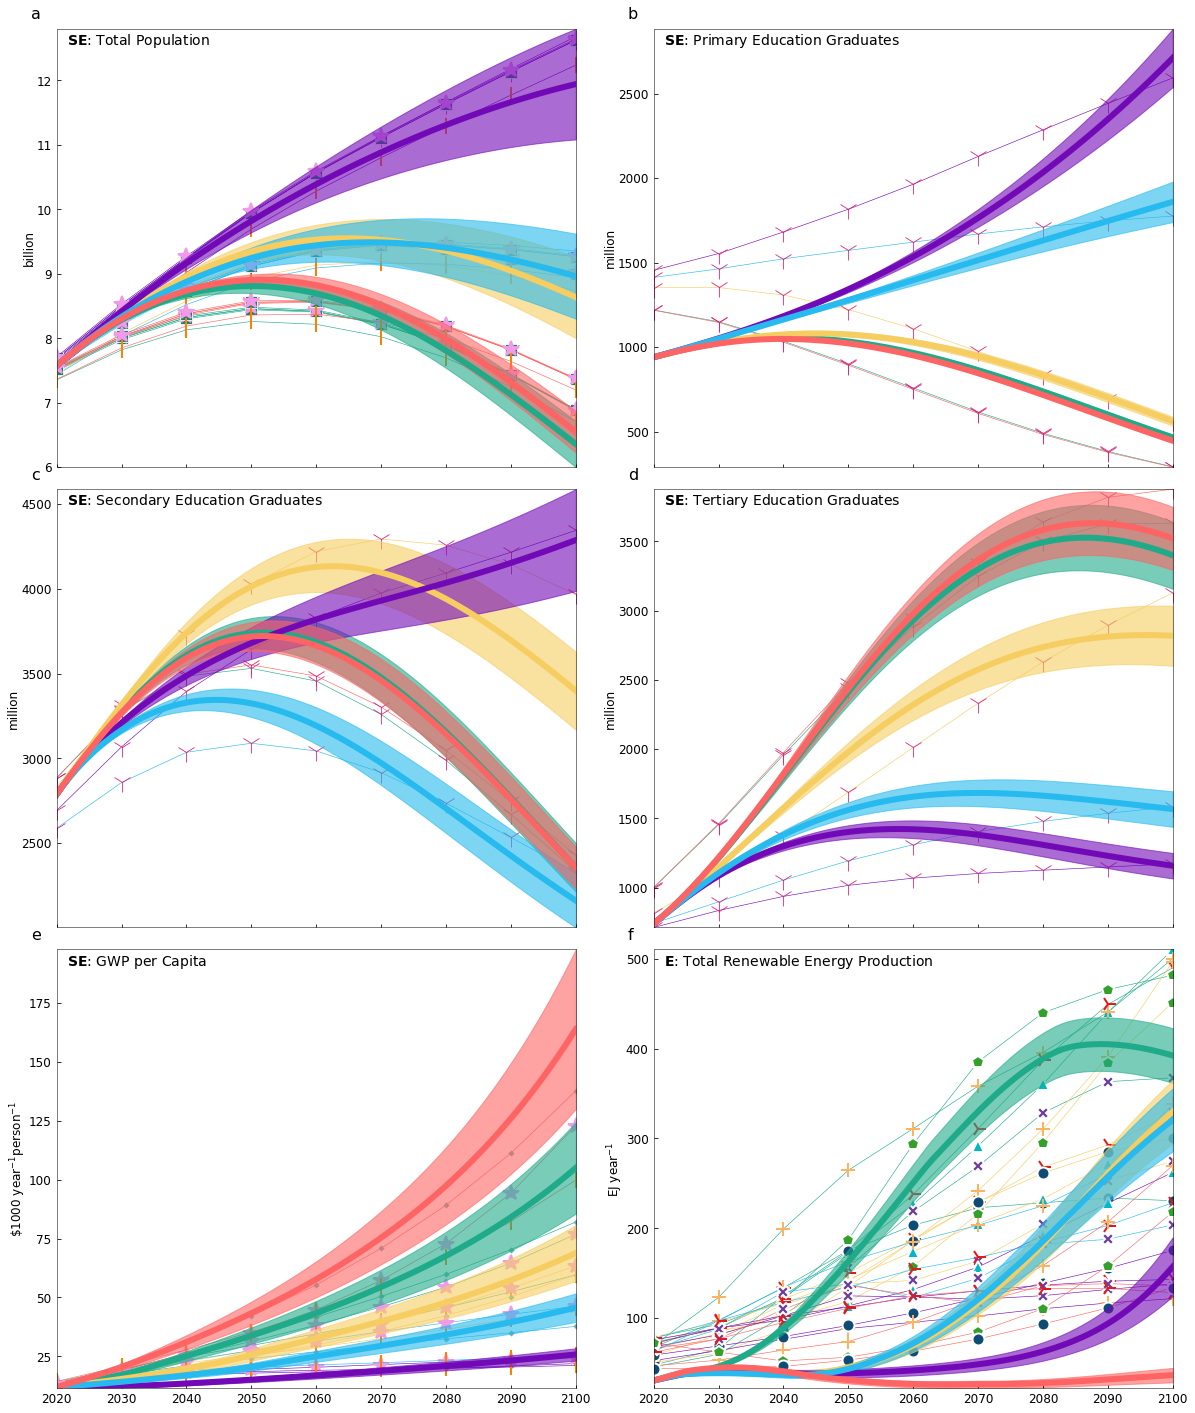

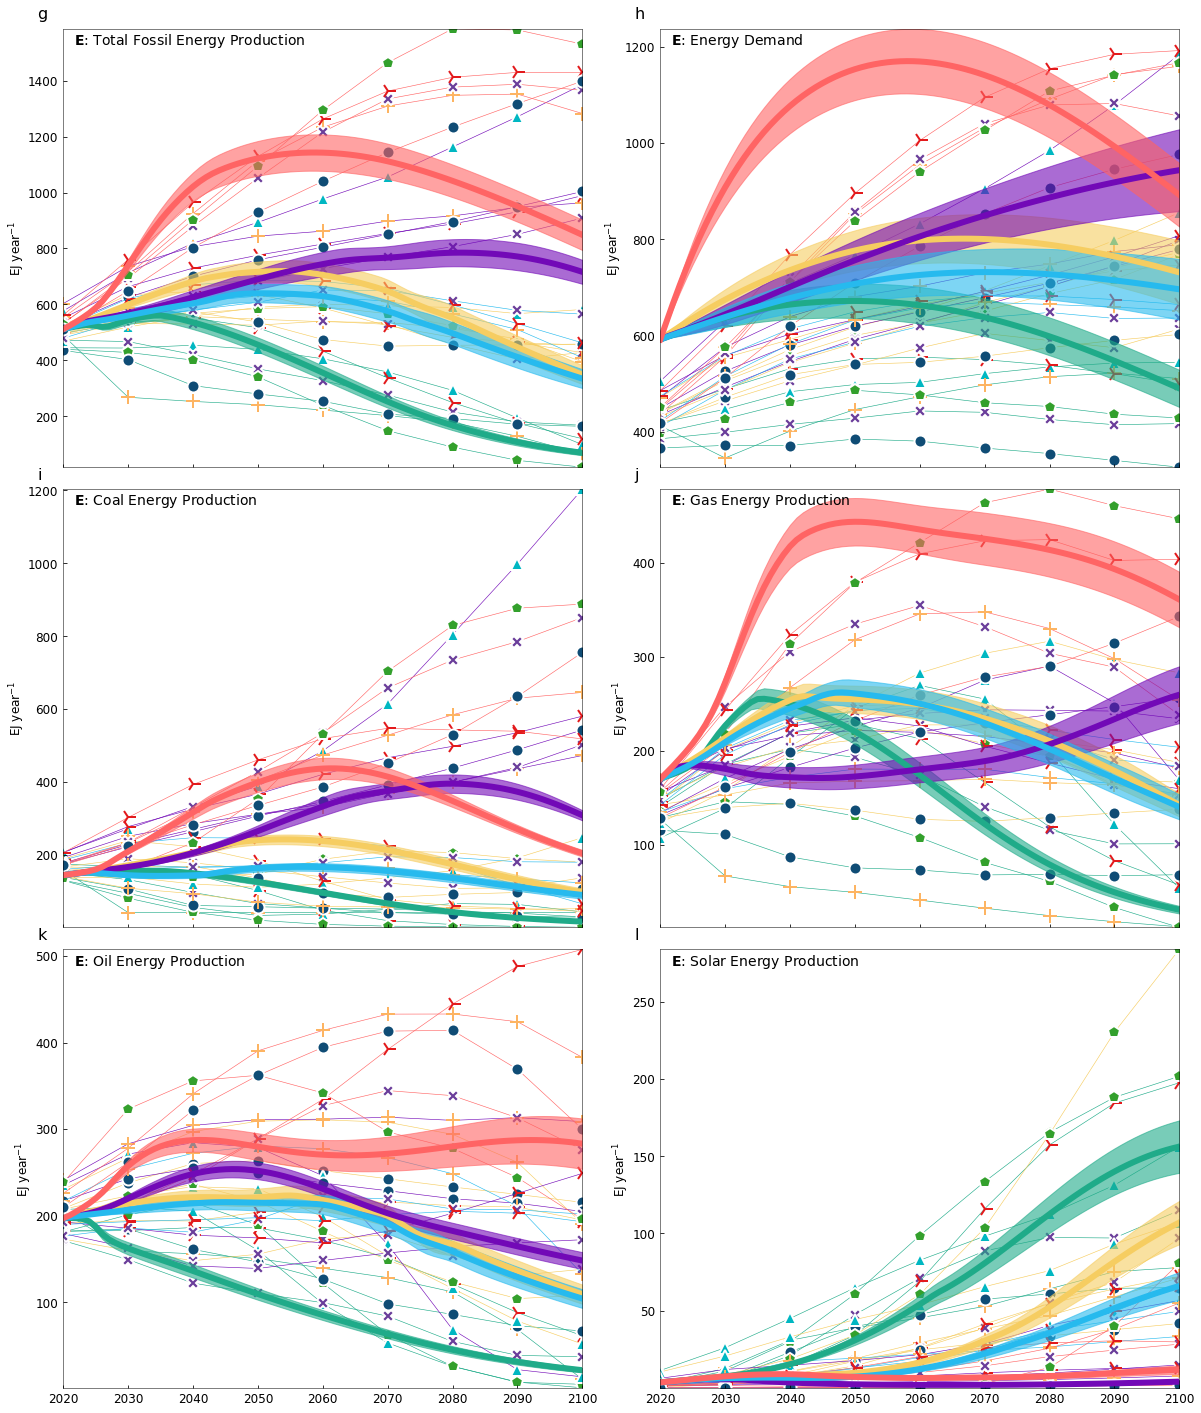

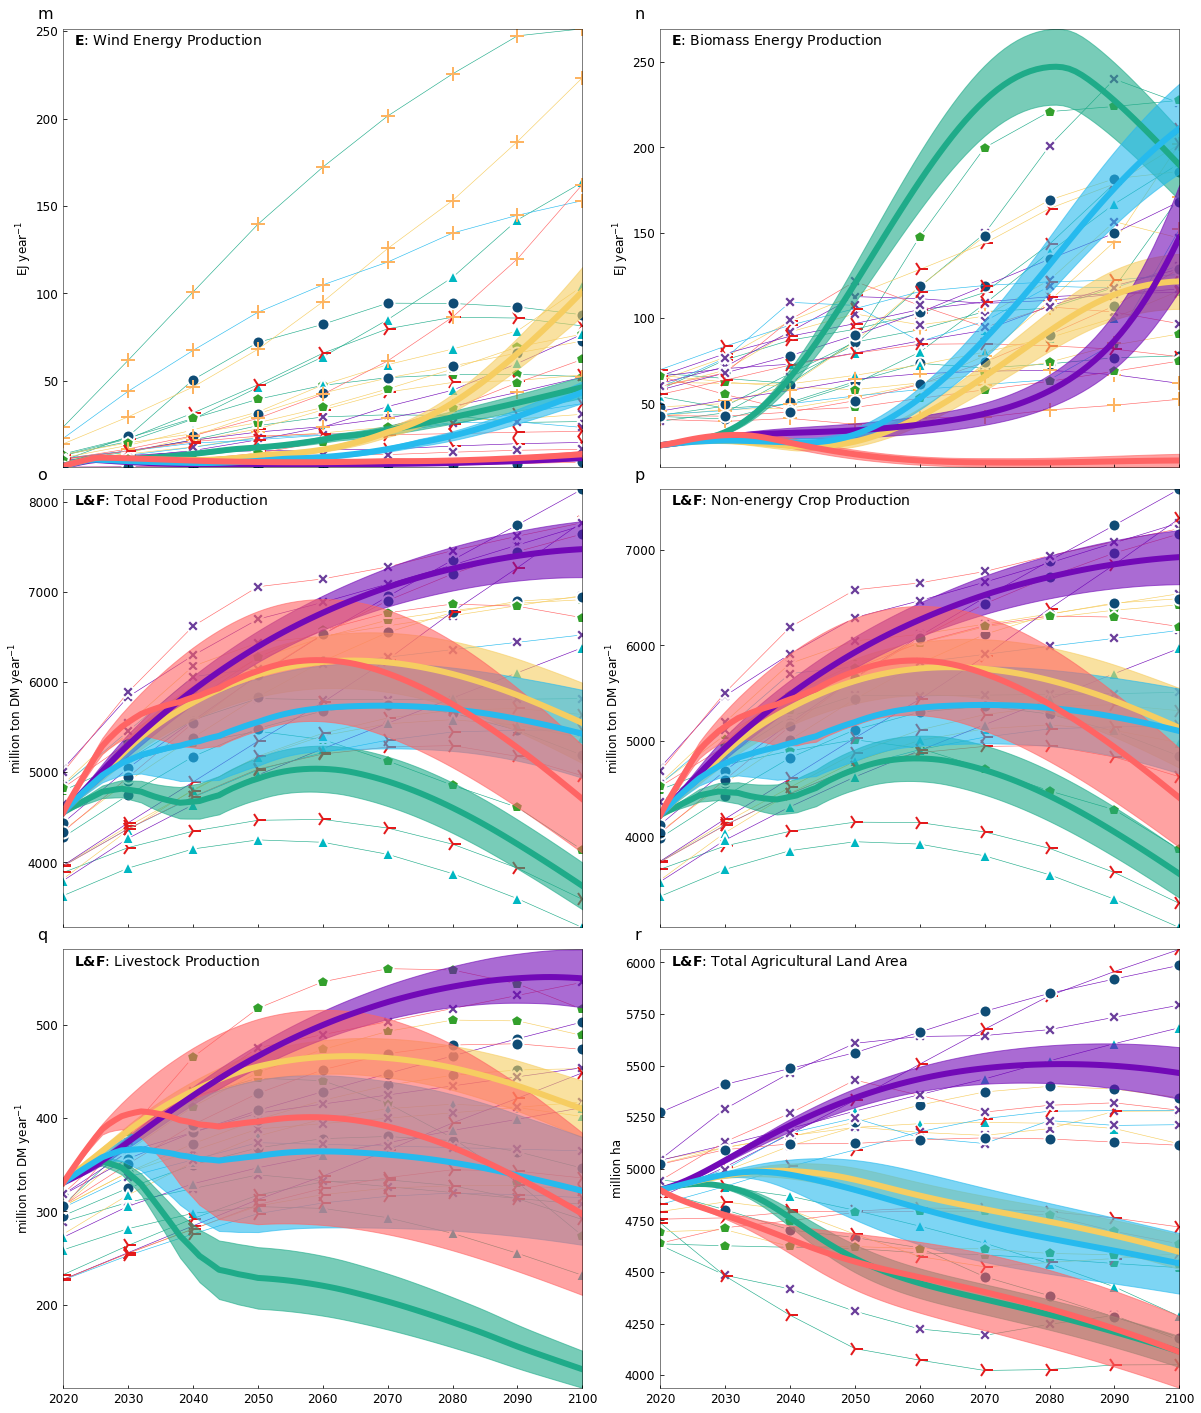

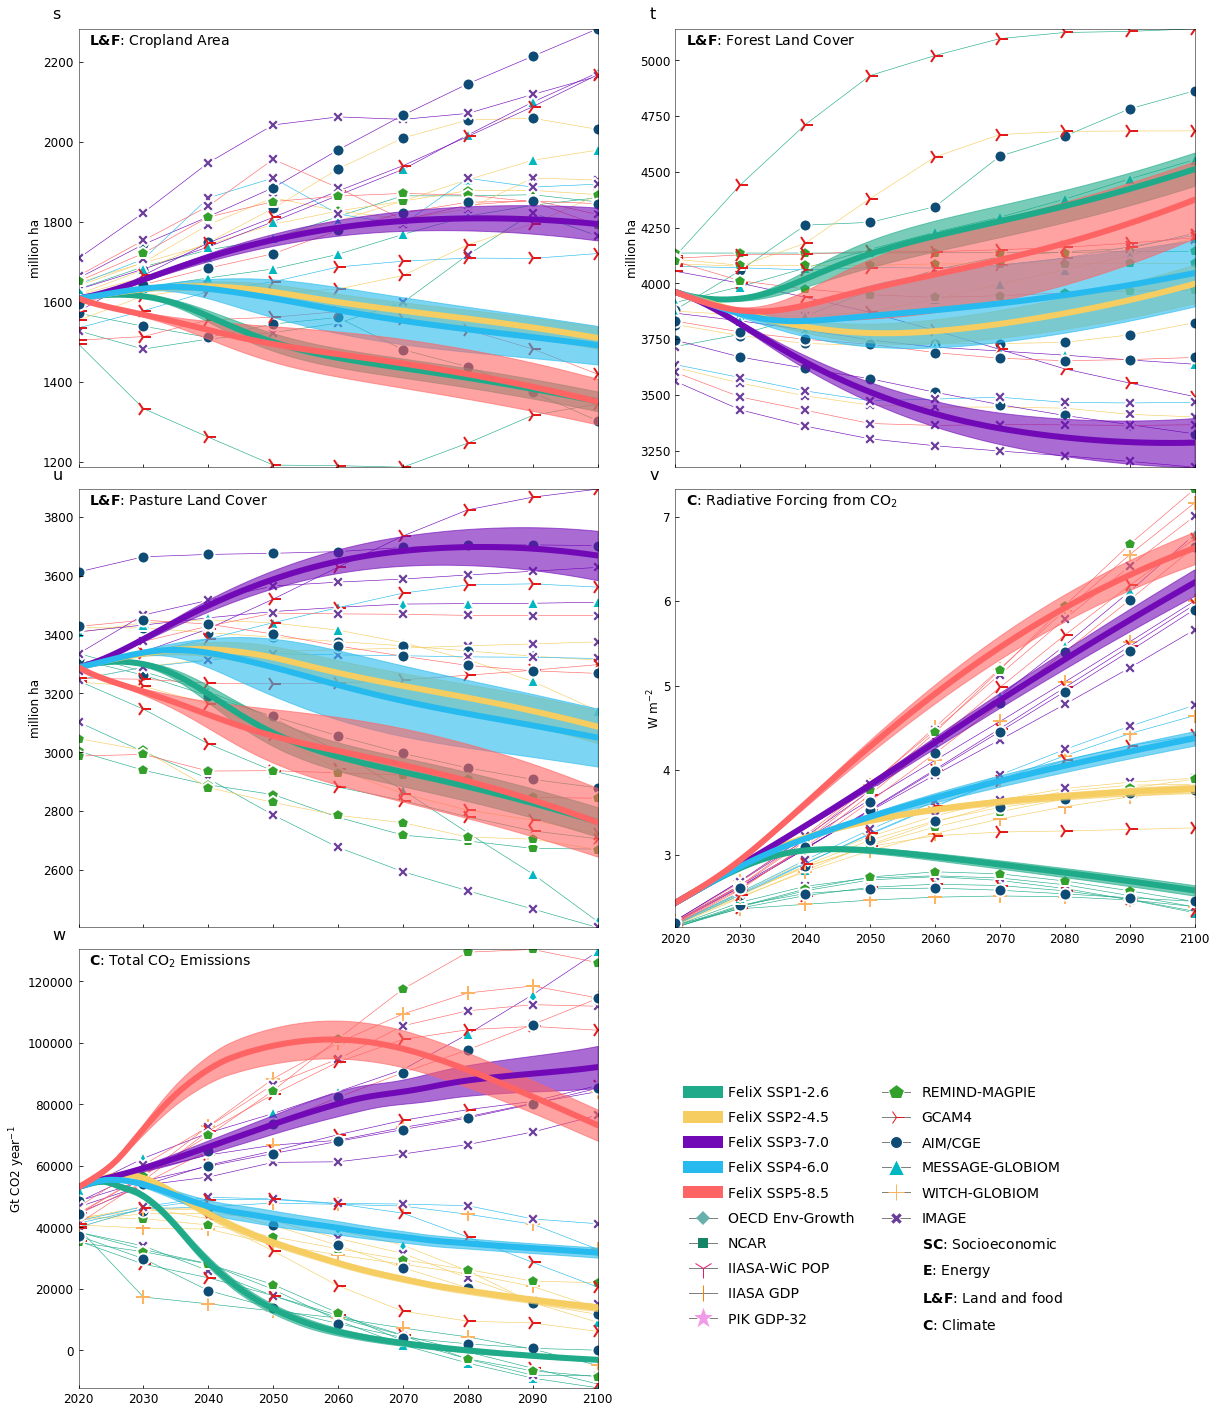

In [145]:
# Develop the  summary calibration plots 

import string

# f is the number of separate figures generated for each page of the SI
for f in range(4):
    
    fig = plt.figure(figsize=(20, 25))

    # The plots will be in n column and am number of rows, depending on the number of indicators
    fig_rows = 3
    fig_cols = 2

    # Set the width ratio of subplots
    grid = plt.GridSpec(fig_rows, fig_cols, hspace=0.05, wspace=0.15)

    ax = {}

    # Create the reference axes for subplots.
    for i in range(fig_rows):
        for j in range(fig_cols):
            ax[i,j] = fig.add_subplot(grid[i, j])
            ax[i,j].tick_params(axis='y', direction='in', pad=5, labelsize=12)
            if (i == 2) and (j in [0,1]):
                lb = True
            elif (f == 3) and (i == 1) and (j == 1):
                lb = True
                
            else:
                lb = False
            ax[i,j].tick_params(axis='x', direction='in', pad=5, labelbottom=lb, labelsize=12)
    if f == 3:
        ax[2,1].axis('off')
    


    # Marker dictionary: the first is marker stye, the second is marker size, the third is marker edge size, the fourth is marker edge colour
    markers = {'OECD Env-Growth':["D", 4, .3, '#68b0ab', '#68b0ab'],
     'NCAR':["s", 6*2, .4*2, 'white', '#158467'],
     'IIASA-WiC POP':["1", 10*2, .4*2, '#e11d74', '#e11d74'],
     'REMIND-MAGPIE':["p", 6*2, 1*2, 'white', '#33a02c'],
     'GCAM4':["4", 8*2, 1*2, '#e31a1c', '#e31a1c'],
     'WITCH-GLOBIOM':["+", 7*2, 1*2, '#fdb462', '#fdb462'],
     'IIASA GDP':["|", 8*2, 1*2, '#ff7f00', '#ff7f00'],
     'IMAGE':["X", 6*2, 1*2, 'white', '#6a3d9a'],
     'AIM/CGE':["o", 6*2, 1*2, 'white', '#0f4c75'],
     'PIK GDP-32':["*", 8*2, 1*2, '#f09ae9', '#f09ae9'],
     'MESSAGE-GLOBIOM':["^", 6*2, 1*2, 'white', '#00b7c2']}


    if f == 3:
        calib_vars = list(sector_key.keys())[0+6*f:6+6*f-1]
    else:
        calib_vars = list(sector_key.keys())[0+6*f:6+6*f]
    #calib_vars = ['CO2 Radiative Forcing Indicator',]

    label_list = list(string.ascii_lowercase)[0+6*f:6+6*f]

    i = 0
    j = 0
    for v, var in enumerate(calib_vars):
        for s, sc in enumerate(scenarios):       

            # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
            dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})

            sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                         estimator=np.mean, data=dict_sc_felix2, ax=ax[i,j], 
                         linewidth=6, color=sc_colors[sc], err_kws={'alpha':.6})

            for model in list(set(sc_models+pop_models+gdp_models)):
                if model in dict_var[var][sc].columns:                  
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i,j], marker=markers[model][0],
                                           markersize=markers[model][1], markeredgewidth=markers[model][2],
                                           markerfacecolor=markers[model][4], markeredgecolor=markers[model][3],
                                           color=sc_colors[sc], linewidth=.6,zorder=-100)

            ax[i,j].set_ylabel('\n'.join(wrap(unit_keys[var], 50)), labelpad=1, fontsize=12)  

            ax[i,j].legend().set_visible(False)

        # Set the title and change the title font size of in smaller plots. 
        ax[i,j].set_title(r"$\bf{" + sector_key[var] + "}$" + ": " + title_keys[var], fontsize=14, color='black', 
                          pad=6, loc='left', x=0.02, y=0.95) 

        # Remove the whitespace at the beginning and end of  x and y axes
        ax[i,j].margins(x=0)
        ax[i,j].margins(y=0)
        ax[i,j].xaxis.label.set_visible(False)

        # Add all subplot labels
        ax[i,j].annotate(label_list[v], size= 16, weight='normal', xy=(-0.05, 1.05), xycoords='axes fraction', ha='left', va='top')

        j += 1
        if j == 2:
            i += 1
            j = 0



    if f == 3:
        # Change the color of legends and have a single unified color legend box for all subplots across SSPs 
        legend_elements = [Line2D([0], [0], color='#1fab89', lw=12, alpha=1, label='FeliX SSP1-2.6'), 
                           Line2D([0], [0], color='#f6cd61', lw=12, alpha=1, label='FeliX SSP2-4.5'),
                           Line2D([0], [0], color='#7209b7', lw=12, alpha=1, label='FeliX SSP3-7.0'),
                           Line2D([0], [0], color='#26baee', lw=12, alpha=1, label='FeliX SSP4-6.0'),
                           Line2D([0], [0], color='#ff6464', lw=12, alpha=1, label='FeliX SSP5-8.5'),
                           Line2D([0], [0], marker="D", color='grey', lw=1, label='OECD Env-Growth', markersize=5*2, markerfacecolor=markers['OECD Env-Growth'][4], markeredgewidth=0, markeredgecolor='white'),
                           Line2D([0], [0], marker="s", color='grey', lw=1, label='NCAR', markersize=5*2, markerfacecolor=markers['NCAR'][4], markeredgewidth=0, markeredgecolor='white'),
                           Line2D([0], [0], marker="1", color='grey', lw=1, label='IIASA-WiC POP', markersize=10*2, markerfacecolor=markers['IIASA-WiC POP'][4], markeredgewidth=1, markeredgecolor=markers['IIASA-WiC POP'][4]),
                           Line2D([0], [0], marker="|", color='grey', lw=1,label='IIASA GDP', markersize=8*2, markerfacecolor=markers['IIASA GDP'][4], markeredgewidth=1, markeredgecolor=markers['IIASA GDP'][4]),
                           Line2D([0], [0], marker="*", color='grey', lw=1,label='PIK GDP-32', markersize=12*2, markerfacecolor=markers['PIK GDP-32'][4], markeredgewidth=1, markeredgecolor='white'),
                           Line2D([0], [0], marker="p", color='grey', lw=1,label='REMIND-MAGPIE', markersize=8*2, markerfacecolor=markers['REMIND-MAGPIE'][4], markeredgewidth=1, markeredgecolor='white'),
                           Line2D([0], [0], marker="4", color='grey', lw=1,label='GCAM4', markersize=8*2, markerfacecolor=markers['GCAM4'][4], markeredgewidth=1, markeredgecolor=markers['GCAM4'][4]),
                           Line2D([0], [0], marker="o", color='grey', lw=1,label='AIM/CGE', markersize=6*2, markerfacecolor=markers['AIM/CGE'][4], markeredgewidth=1, markeredgecolor='white'),
                           Line2D([0], [0], marker="^", color='grey', lw=1,label='MESSAGE-GLOBIOM', markersize=8*2, markerfacecolor=markers['MESSAGE-GLOBIOM'][4], markeredgewidth=1, markeredgecolor='white'),
                           Line2D([0], [0], marker="+", color='grey', lw=1,label='WITCH-GLOBIOM', markersize=8*2, markerfacecolor=markers['WITCH-GLOBIOM'][4], markeredgewidth=1, markeredgecolor=markers['WITCH-GLOBIOM'][4]),
                           Line2D([0], [0], marker="X", color='grey', lw=1,label='IMAGE', markersize=6*2, markerfacecolor=markers['IMAGE'][4], markeredgewidth=1, markeredgecolor='white'),
                           Line2D([0], [0], marker="", color='#ff6464', lw=0,label= r"$\bf{" + 'SC' + "}$" + ': Socioeconomic'),
                           Line2D([0], [0], marker="", color='#ff6464', lw=0,label=r"$\bf{" + 'E' + "}$" + ': Energy'),
                           Line2D([0], [0], marker="", color='#ff6464', lw=0,label=r"$\bf{" + 'L&F' + "}$" + ': Land and food'),
                           Line2D([0], [0], marker="", color='#ff6464', lw=0,label=r"$\bf{" + 'C' + "}$" + ': Climate')      
                          ]

        fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.54, .3),  
                   bbox_transform=fig.transFigure, ncol=2, fontsize=14, labelspacing=.8, frameon=False)

    mpl.rcParams['axes.linewidth'] =.5

    plt.savefig('{}/SSPs_calibration_plots_p{}_EF_300dpi.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/', f), dpi=300,  bbox_inches='tight') 
    plt.savefig('{}/SSPs_calibration_plots_p{}_EF.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/', f), dpi=600,  bbox_inches='tight') 
    #plt.savefig('{}/SSPs_calibration_plots_EF.pdf'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 


## Archive

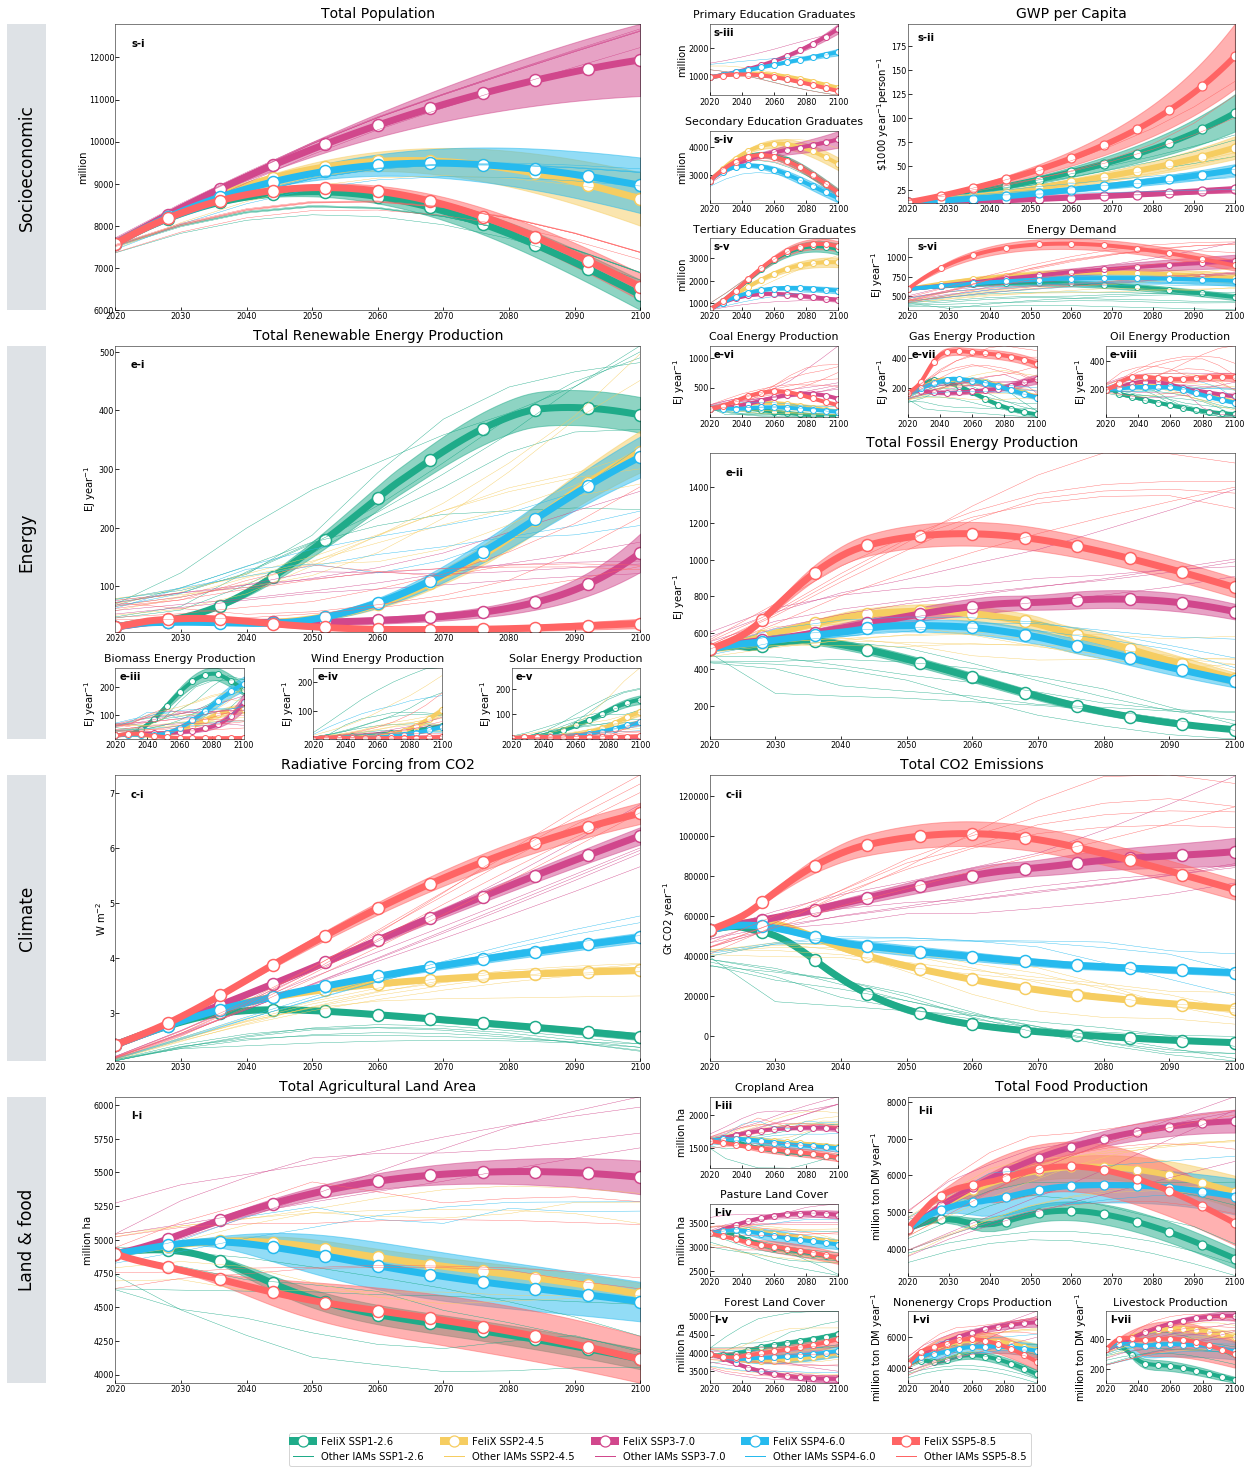

In [95]:
# Develop the  summary calibration plots 

import string

fig = plt.figure(figsize=(22, 25))

# The plots will be in n column and am number of rows, depending on the number of indicators
fig_rows = 13
fig_cols = 7

# Set the width ratio of subplots
grid = plt.GridSpec(fig_rows, fig_cols, hspace=0.5, wspace=0.6, width_ratios=[.3,1,1,1,1,1,1])

ax = {}

# Create the reference axes for subplots.
ax[0] = fig.add_subplot(grid[0:3, 1:4])
ax[1] = fig.add_subplot(grid[0:2,5:7])
ax[2] = fig.add_subplot(grid[3:6,1:4])
ax[3] = fig.add_subplot(grid[4:7,4:7])
ax[4] = fig.add_subplot(grid[7:10,1:4])
ax[5] = fig.add_subplot(grid[7:10,4:7])
ax[6] = fig.add_subplot(grid[10:13,1:4])
ax[7] = fig.add_subplot(grid[10:12,5:7])
ax[8] = fig.add_subplot(grid[0,4])
ax[9] = fig.add_subplot(grid[1,4])
ax[10] = fig.add_subplot(grid[2,4])
ax[11] = fig.add_subplot(grid[2,5:7])
ax[12] = fig.add_subplot(grid[6,1])
ax[13] = fig.add_subplot(grid[6,2])
ax[14] = fig.add_subplot(grid[6,3])
ax[15] = fig.add_subplot(grid[3,4])
ax[16] = fig.add_subplot(grid[3,5])
ax[17] = fig.add_subplot(grid[3,6])
ax[18] = fig.add_subplot(grid[10,4])
ax[19] = fig.add_subplot(grid[11,4])
ax[20] = fig.add_subplot(grid[12,4])
ax[21] = fig.add_subplot(grid[12,5])
ax[22] = fig.add_subplot(grid[12,6])
ax[23] = fig.add_subplot(grid[0:3,0])
ax[24] = fig.add_subplot(grid[3:7,0])
ax[25] = fig.add_subplot(grid[7:10,0])
ax[26] = fig.add_subplot(grid[10:13,0])

for i in range(27):
    ax[i].tick_params(axis='y', direction='in', pad=1, labelsize=8)
    ax[i].tick_params(axis='x', direction='in', pad=2, labelsize=8)

sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#d1478c', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}

# Marker dictionary: the first is marker stye, the second is marker size, the third is marker edge size, the fourth is marker edge colour  
markers = {
 'SSP1-26':["1", 10, 1, '#1fab89', '#1fab89'],
 'SSP2-45':["X", 9, 0, 'white', '#f6cd61'],
 'SSP3-70':["+", 10, 1, '#d1478c', '#d1478c'],
 'SSP4-60':["^", 8, .1, '#26baee', '#26baee'],
 'SSP5-85':["*", 8, 1, '#ff6464', '#ff6464']
 }

calib_vars = ['Total Population Indicator', 
              'GWP per Capita Indicator',
            'Renewable Energy Production Indicator', 
            'Fossil Energy Production Indicator', 
            'CO2 Radiative Forcing Indicator', 
            'Total CO2 Emissions Indicator', 
            'Agricultural Lands Indicator',
            'Food Production Indicator', 
            'Total Primary Education Graduates Indicator',
            'Total Secondary Education Graduates Indicator',
            'Total Tertiary Education Graduates Indicator', 
            'Energy Demand Indicator', 
            'Biomass Energy Production Indicator',
            'Wind Energy Production Indicator',
            'Solar Energy Production Indicator',
            'Coal Production Indicator' ,
            'Gas Production Indicator',
            'Oil Production Indicator',
            'Total Croplands Indicator',
            'Pasture Land Indicator',
            'Forest Land Indicator', 
            'Nonenergy Crops Production Indicator' ,
            'Livestock Production Indicator'   
            ]

i = 0
for v, var in enumerate(calib_vars):
    for s, sc in enumerate(scenarios):       
        
        # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
        dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})
        
        # Change the size of marker for smaller plots. 7 is the number of large subplots
        if i > 7:
            markersize=6
            linewidth=4
            markeredgewidth=1
        elif i in [1, 7]:
            markersize=9
            linewidth=6
            markeredgewidth=1.25
        else:
            markersize=12
            linewidth=7
            markeredgewidth=1.5
            
        sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                     estimator=np.mean, data=dict_sc_felix2, ax=ax[i], 
                     marker='o', markersize=markersize, markerfacecolor='white', markeredgecolor = sc_colors[sc], 
                     markeredgewidth=markeredgewidth, markevery=8,
                     linewidth=linewidth, color=sc_colors[sc], err_kws={'alpha':.5})
        
        for model in list(set(sc_models+pop_models+gdp_models)):
            if model in dict_var[var][sc].columns:                  
                
                # Change the size of marker for smaller plots. 7 is the number of large subplots
                if i > 7:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i],  
                                                                 color=sc_colors[sc], linewidth=.4
                                                                 )
                else:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i], 
                                                             color=sc_colors[sc], linewidth=.4
                                                             )
        
        ax[i].set_ylabel('\n'.join(wrap(unit_keys[var], 50)), labelpad=1)  

        ax[i].legend().set_visible(False)

    # Set the title and change the title font size of in smaller plots. 7 is the number of large subplots
    if i > 7:
        ax[i].set_title(title_keys[var], fontsize=11, color='black', pad=6) 
        #ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 11, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    else:
        ax[i].set_title(title_keys[var], fontsize=14, color='black', pad=6) 
        #ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 14, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    
    # Remove the whitespace at the beginning and end of  x and y axes
    ax[i].margins(x=0)
    ax[i].margins(y=0)
    ax[i].xaxis.label.set_visible(False)
    
    i+= 1

# Add all subplot labels
fig_sc = ['-i', '-ii', '-iii', '-iv', '-v', '-vi', '-vii', '-viii']
for n, i in enumerate([0,1,8,9,10,11]):
    ax[i].annotate('s'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([2,3,12,13,14,15,16,17]):
    ax[i].annotate('e'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([4,5]):
    ax[i].annotate('c'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([6,7,18,19,20,21,22]):
    ax[i].annotate('l'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
        



# Draw side title for group subplots
for i, c in enumerate(['Socioeconomic', 'Energy', 'Climate', 'Land & food']):
    ax[i+23].set_facecolor('#dee2e6')
    ax[i+23].spines['top'].set_visible(False)
    ax[i+23].spines['right'].set_visible(False)
    ax[i+23].spines['bottom'].set_visible(False)
    ax[i+23].spines['left'].set_visible(False)
    ax[i+23].get_xaxis().set_ticks([])
    ax[i+23].get_yaxis().set_ticks([])
    ax[i+23].annotate(c, size= 17, weight='regular', xy=(0.5, .5), rotation=90, xycoords='axes fraction', ha='center', va='center')

    
# Change the color of legends and have a single unified color legend box for all subplots across SSPs 
legend_elements = [Line2D([0], [0], color='#1fab89', lw=8, alpha=1, label='FeliX SSP1-2.6', 
                          marker='o', markersize=11, markerfacecolor='white', markeredgecolor='#1fab89', markeredgewidth=1.25),
                   Line2D([0], [0], marker="", color='#1fab89', lw=1, label='Other IAMs SSP1-2.6'),
                   
                   Line2D([0], [0], color='#f6cd61', lw=8, alpha=1, label='FeliX SSP2-4.5',
                          marker='o', markersize=11, markerfacecolor='white', markeredgecolor='#f6cd61', markeredgewidth=1.25),
                   Line2D([0], [0], marker="", color='#f6cd61', lw=1,label='Other IAMs SSP2-4.5'),
                   
                   Line2D([0], [0], color='#d1478c', lw=8, alpha=1, label='FeliX SSP3-7.0',
                          marker='o', markersize=11, markerfacecolor='white', markeredgecolor='#d1478c', markeredgewidth=1.25),
                   Line2D([0], [0], marker="", color='#d1478c', lw=1,label='Other IAMs SSP3-7.0'),
                   
                   Line2D([0], [0], color='#26baee', lw=8, alpha=1, label='FeliX SSP4-6.0',
                          marker='o', markersize=11, markerfacecolor='white', markeredgecolor='#26baee', markeredgewidth=1.25),
                   Line2D([0], [0], marker="", color='#26baee', lw=1,label='Other IAMs SSP4-6.0'),
                   
                   Line2D([0], [0], color='#ff6464', lw=8, alpha=1, label='FeliX SSP5-8.5',
                          marker='o', markersize=11, markerfacecolor='white', markeredgecolor='#ff6464', markeredgewidth=1.25),
                   Line2D([0], [0], marker="", color='#ff6464', lw=1,label='Other IAMs SSP5-8.5')   
                  ]

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.3, .1),  bbox_transform=fig.transFigure, ncol=5)

mpl.rcParams['axes.linewidth'] =.5

plt.savefig('{}/SSPs_calibration_plots_EF_300dpi.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=300,  bbox_inches='tight') 
plt.savefig('{}/SSPs_calibration_plots_EF.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 
plt.savefig('{}/SSPs_calibration_plots_EF.pdf'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 

plt.show()

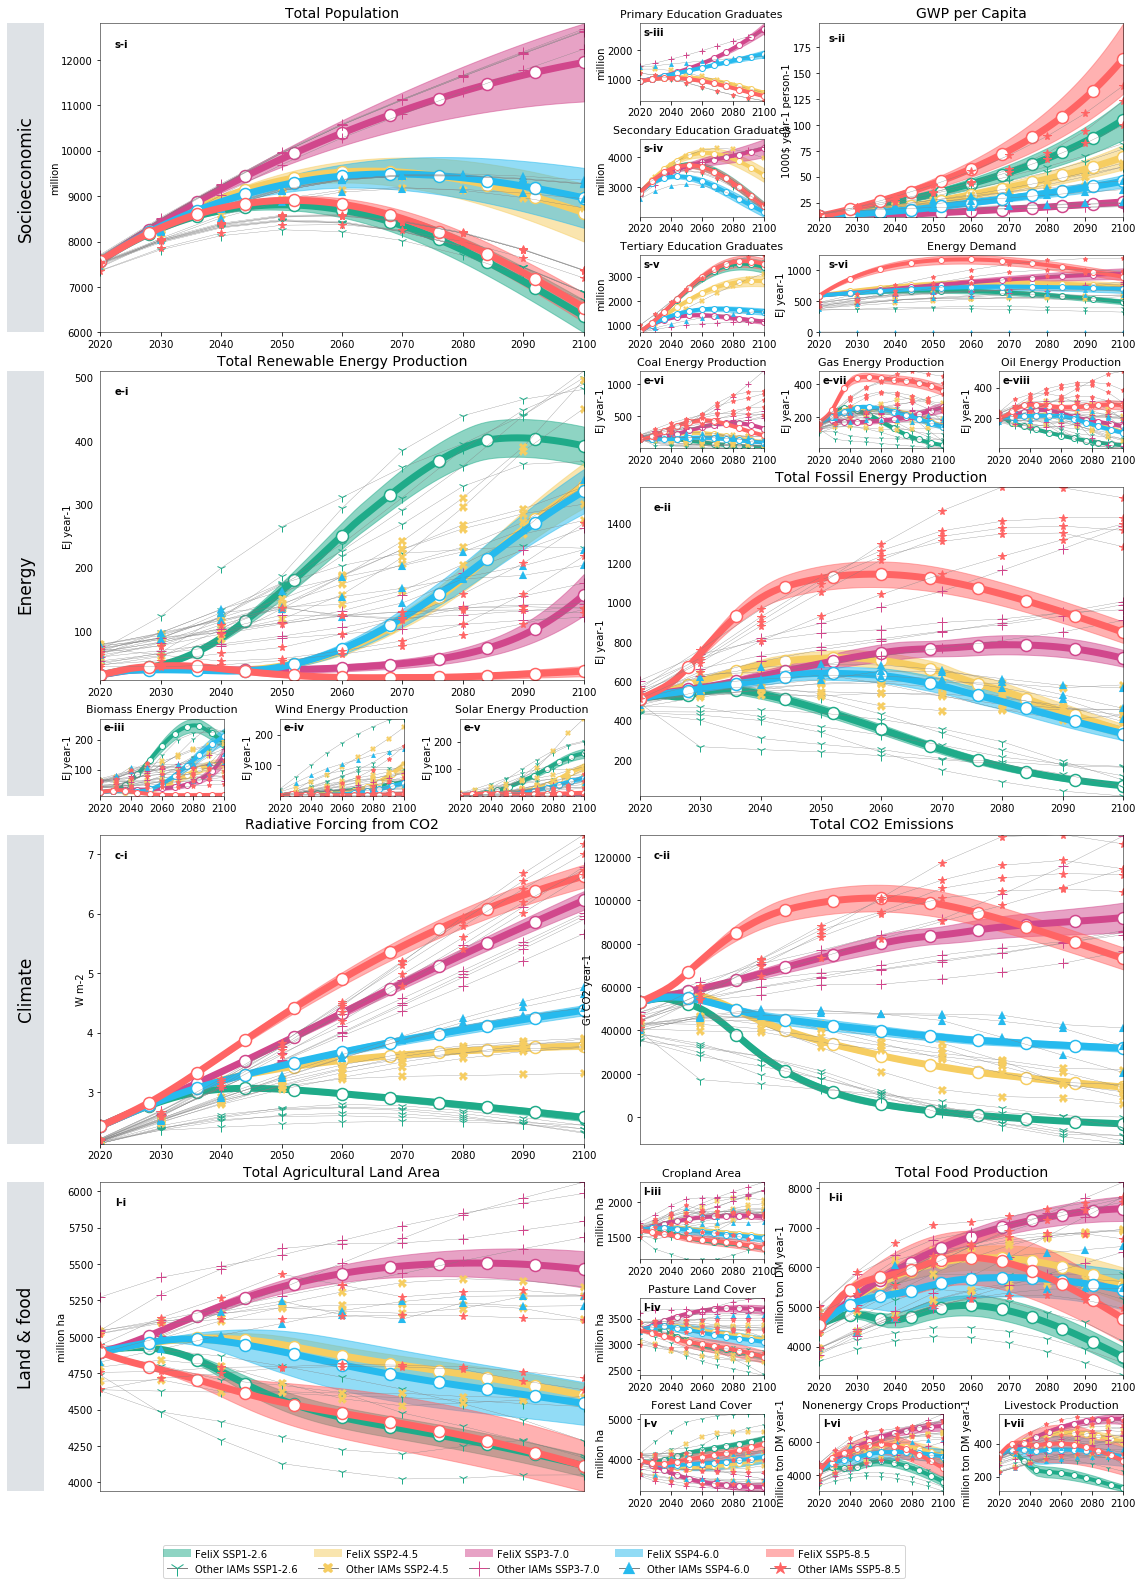

In [248]:
# Develop the  summary calibration plots 

import string

fig = plt.figure(figsize=(20, 27))

# The plots will be in n column and am number of rows, depending on the number of indicators
fig_rows = 13
fig_cols = 7

# Set the width ratio of subplots
grid = plt.GridSpec(fig_rows, fig_cols, hspace=0.5, wspace=0.5, width_ratios=[.3,1,1,1,1,1,1])

ax = {}

# Create the reference axes for subplots.
ax[0] = fig.add_subplot(grid[0:3, 1:4])
ax[1] = fig.add_subplot(grid[0:2,5:7])
ax[2] = fig.add_subplot(grid[3:6,1:4])
ax[3] = fig.add_subplot(grid[4:7,4:7])
ax[4] = fig.add_subplot(grid[7:10,1:4])
ax[5] = fig.add_subplot(grid[7:10,4:7])
ax[6] = fig.add_subplot(grid[10:13,1:4])
ax[7] = fig.add_subplot(grid[10:12,5:7])
ax[8] = fig.add_subplot(grid[0,4])
ax[9] = fig.add_subplot(grid[1,4])
ax[10] = fig.add_subplot(grid[2,4])
ax[11] = fig.add_subplot(grid[2,5:7])
ax[12] = fig.add_subplot(grid[6,1])
ax[13] = fig.add_subplot(grid[6,2])
ax[14] = fig.add_subplot(grid[6,3])
ax[15] = fig.add_subplot(grid[3,4])
ax[16] = fig.add_subplot(grid[3,5])
ax[17] = fig.add_subplot(grid[3,6])
ax[18] = fig.add_subplot(grid[10,4])
ax[19] = fig.add_subplot(grid[11,4])
ax[20] = fig.add_subplot(grid[12,4])
ax[21] = fig.add_subplot(grid[12,5])
ax[22] = fig.add_subplot(grid[12,6])
ax[23] = fig.add_subplot(grid[0:3,0])
ax[24] = fig.add_subplot(grid[3:7,0])
ax[25] = fig.add_subplot(grid[7:10,0])
ax[26] = fig.add_subplot(grid[10:13,0])

sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#d1478c', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}

# Marker dictionary: the first is marker stye, the second is marker size, the third is marker edge size, the fourth is marker edge colour  
markers = {
 'SSP1-26':["1", 10, 1, '#1fab89', '#1fab89'],
 'SSP2-45':["X", 9, 0, 'white', '#f6cd61'],
 'SSP3-70':["+", 10, 1, '#d1478c', '#d1478c'],
 'SSP4-60':["^", 8, .1, '#26baee', '#26baee'],
 'SSP5-85':["*", 8, 1, '#ff6464', '#ff6464']
 }

calib_vars = ['Total Population Indicator', 
              'GWP per Capita Indicator',
            'Renewable Energy Production Indicator', 
            'Fossil Energy Production Indicator', 
            'CO2 Radiative Forcing Indicator', 
            'Total CO2 Emissions Indicator', 
            'Agricultural Lands Indicator',
            'Food Production Indicator', 
            'Total Primary Education Graduates Indicator',
            'Total Secondary Education Graduates Indicator',
            'Total Tertiary Education Graduates Indicator', 
            'Energy Demand Indicator', 
            'Biomass Energy Production Indicator',
            'Wind Energy Production Indicator',
            'Solar Energy Production Indicator',
            'Coal Production Indicator' ,
            'Gas Production Indicator',
            'Oil Production Indicator',
            'Total Croplands Indicator',
            'Pasture Land Indicator',
            'Forest Land Indicator', 
            'Nonenergy Crops Production Indicator' ,
            'Livestock Production Indicator'   
            ]
i = 0
for v, var in enumerate(calib_vars):
    for s, sc in enumerate(scenarios):       
        
        # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
        dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})
        
        # Change the size of marker for smaller plots. 7 is the number of large subplots
        if i > 7:
            markersize=6
            linewidth=4
            markeredgewidth=1
        else:
            markersize=12
            linewidth=7
            markeredgewidth=1.5
            
        sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                     estimator=np.mean, data=dict_sc_felix2, ax=ax[i], 
                     marker='o', markersize=markersize, markerfacecolor='white', markeredgecolor = sc_colors[sc], 
                     markeredgewidth=markeredgewidth, markevery=8,
                     linewidth=linewidth, color=sc_colors[sc], err_kws={'alpha':.5})
        
        for model in list(set(sc_models+pop_models+gdp_models)):
            if model in dict_var[var][sc].columns:                  
                
                # Change the size of marker for smaller plots. 7 is the number of large subplots
                if i > 7:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i], marker=markers[sc][0], 
                                                                 markersize=markers[sc][1]*.6, markeredgewidth=markers[sc][2],
                                                                 markerfacecolor=markers[sc][4], markeredgecolor=markers[sc][3], 
                                                                 color='grey', linewidth=.3
                                                                 )
                else:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i], marker=markers[sc][0], 
                                                             markersize=markers[sc][1], markeredgewidth=markers[sc][2],
                                                             markerfacecolor=markers[sc][4], markeredgecolor=markers[sc][3], 
                                                             color='grey', linewidth=.3
                                                             )
        
        ax[i].set_ylabel('\n'.join(wrap(unit_keys[var], 30)), labelpad=1)  

        ax[i].legend().set_visible(False)

    # Set the title and change the title font size of in smaller plots. 7 is the number of large subplots
    if i > 7:
        ax[i].set_title(title_keys[var], fontsize=11, color='black', pad=6) 
        #ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 11, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    else:
        ax[i].set_title(title_keys[var], fontsize=14, color='black', pad=6) 
        #ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 14, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    
    # Remove the whitespace at the beginning and end of  x and y axes
    ax[i].margins(x=0)
    ax[i].margins(y=0)
    ax[i].xaxis.label.set_visible(False)
    
    i+= 1

# Add all subplot labels
fig_sc = ['-i', '-ii', '-iii', '-iv', '-v', '-vi', '-vii', '-viii']
for n, i in enumerate([0,1,8,9,10,11]):
    ax[i].annotate('s'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([2,3,12,13,14,15,16,17]):
    ax[i].annotate('e'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([4,5]):
    ax[i].annotate('c'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([6,7,18,19,20,21,22]):
    ax[i].annotate('l'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
        

# Removing ticks for inner plots                
for i in [6,5]:
    ax[i].tick_params(bottom=False, labelbottom=False)
for i in [2,3]:
    ax[i].tick_params(left=False)

# Draw side title for group subplots
for i, c in enumerate(['Socioeconomic', 'Energy', 'Climate', 'Land & food']):
    ax[i+23].set_facecolor('#dee2e6')
    ax[i+23].spines['top'].set_visible(False)
    ax[i+23].spines['right'].set_visible(False)
    ax[i+23].spines['bottom'].set_visible(False)
    ax[i+23].spines['left'].set_visible(False)
    ax[i+23].get_xaxis().set_ticks([])
    ax[i+23].get_yaxis().set_ticks([])
    ax[i+23].annotate(c, size= 17, weight='regular', xy=(0.5, .5), rotation=90, xycoords='axes fraction', ha='center', va='center')

    
# Change the color of legends and have a single unified color legend box for all subplots across SSPs 
legend_elements = [Line2D([0], [0], color='#1fab89', lw=8, alpha=.5, label='FeliX SSP1-2.6'),
                   Line2D([0], [0], marker="1", color='grey', lw=1, label='Other IAMs SSP1-2.6', markersize=markers['SSP1-26'][1]*1.5, markerfacecolor=markers['SSP1-26'][4], markeredgewidth=1, markeredgecolor=markers['SSP1-26'][4]),
                   Line2D([0], [0], color='#f6cd61', lw=8, alpha=.5, label='FeliX SSP2-4.5'),
                   Line2D([0], [0], marker="X", color='grey', lw=1,label='Other IAMs SSP2-4.5', markersize=markers['SSP2-45'][1]*1.2, markerfacecolor=markers['SSP2-45'][4], markeredgewidth=.2, markeredgecolor=markers['SSP2-45'][4]),
                   Line2D([0], [0], color='#d1478c', lw=8, alpha=.5, label='FeliX SSP3-7.0'),
                   Line2D([0], [0], marker="+", color='grey', lw=1,label='Other IAMs SSP3-7.0', markersize=markers['SSP3-70'][1]*1.5, markerfacecolor=markers['SSP3-70'][4], markeredgewidth=1, markeredgecolor=markers['SSP3-70'][4]),
                   Line2D([0], [0], color='#26baee', lw=8, alpha=.5, label='FeliX SSP4-6.0'),
                   Line2D([0], [0], marker="^", color='grey', lw=1,label='Other IAMs SSP4-6.0', markersize=markers['SSP4-60'][1]*1.5, markerfacecolor=markers['SSP4-60'][4], markeredgewidth=.2, markeredgecolor=markers['SSP4-60'][4]),
                   Line2D([0], [0], color='#ff6464', lw=8, alpha=.5, label='FeliX SSP5-8.5'),
                   Line2D([0], [0], marker="*", color='grey', lw=1,label='Other IAMs SSP5-8.5', markersize=markers['SSP5-85'][1]*1.5, markerfacecolor=markers['SSP5-85'][4], markeredgewidth=1, markeredgecolor=markers['SSP5-85'][4])   
                  ]

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.23, .1),  bbox_transform=fig.transFigure, ncol=5)

mpl.rcParams['axes.linewidth'] =.5

#plt.savefig('{}/SSPs_calibration_plots_EF_300dpi.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=300,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_EF.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_EF.pdf'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_EF.svg'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight')

plt.show()

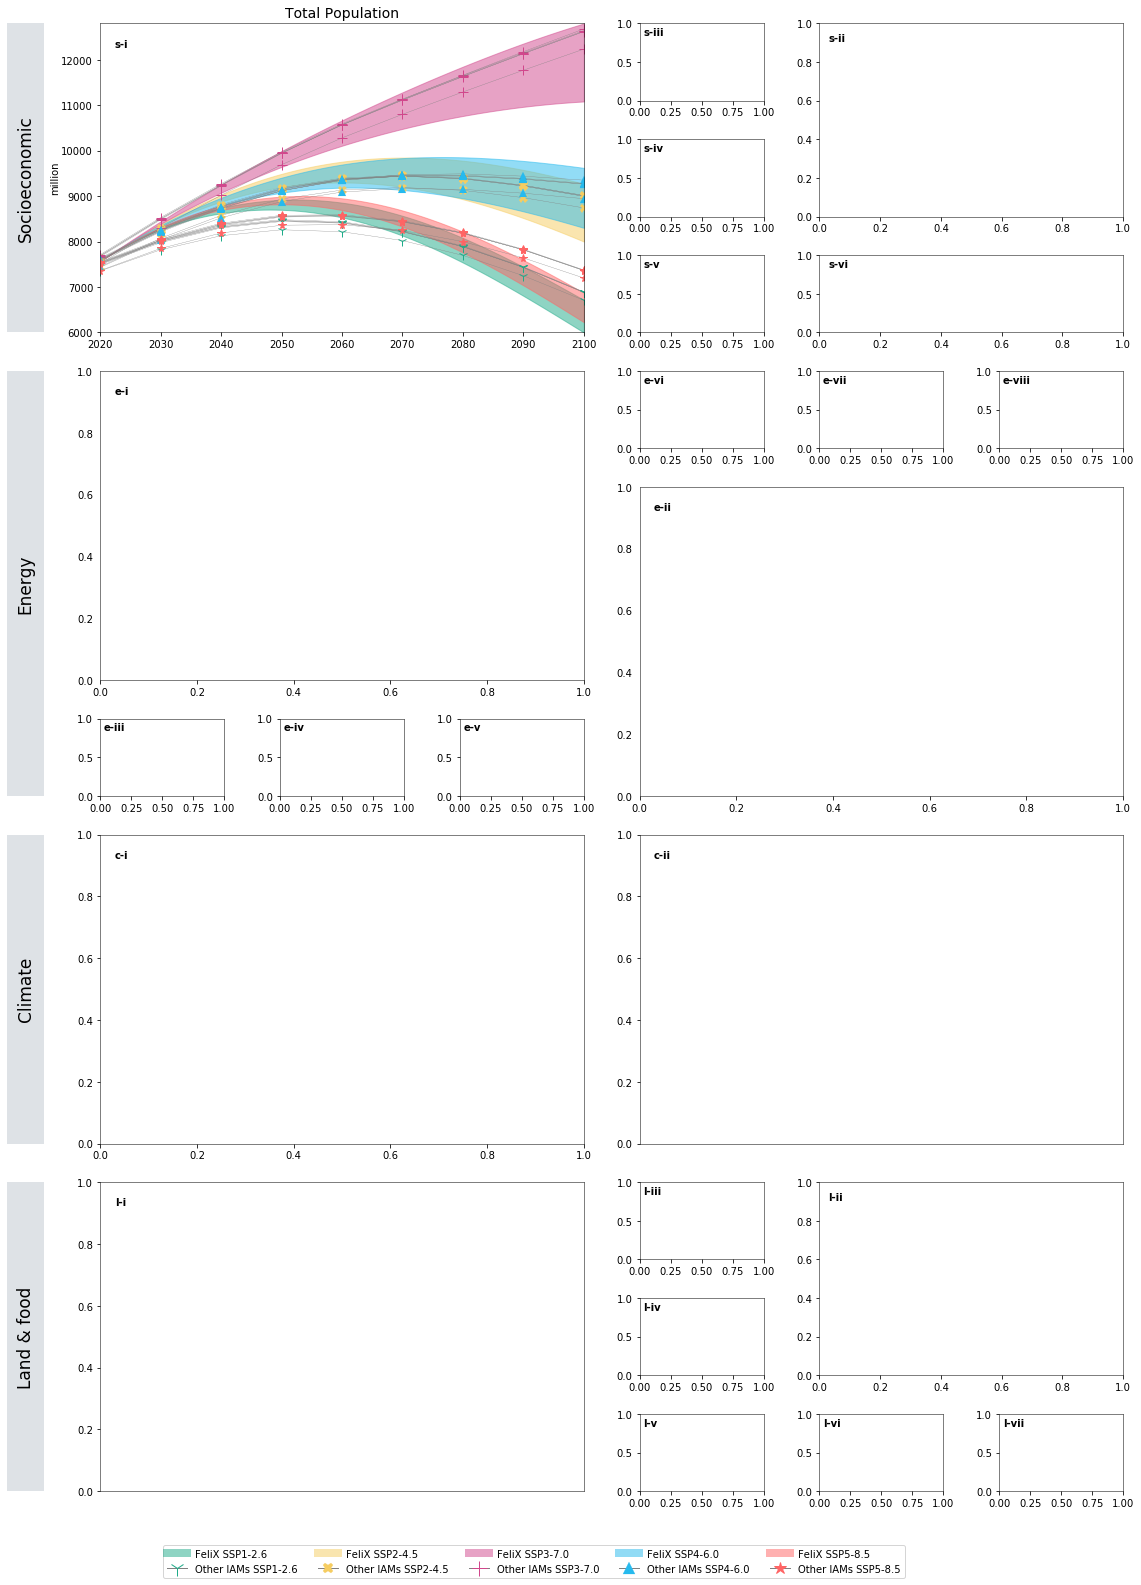

In [237]:
# Develop the  summary calibration plots 

import string

fig = plt.figure(figsize=(20, 27))

# The plots will be in n column and am number of rows, depending on the number of indicators
fig_rows = 13
fig_cols = 7

# Set the width ratio of subplots
grid = plt.GridSpec(fig_rows, fig_cols, hspace=0.5, wspace=0.5, width_ratios=[.3,1,1,1,1,1,1])

ax = {}

# Create the reference axes for subplots.
ax[0] = fig.add_subplot(grid[0:3, 1:4])
ax[1] = fig.add_subplot(grid[0:2,5:7])
ax[2] = fig.add_subplot(grid[3:6,1:4])
ax[3] = fig.add_subplot(grid[4:7,4:7])
ax[4] = fig.add_subplot(grid[7:10,1:4])
ax[5] = fig.add_subplot(grid[7:10,4:7])
ax[6] = fig.add_subplot(grid[10:13,1:4])
ax[7] = fig.add_subplot(grid[10:12,5:7])
ax[8] = fig.add_subplot(grid[0,4])
ax[9] = fig.add_subplot(grid[1,4])
ax[10] = fig.add_subplot(grid[2,4])
ax[11] = fig.add_subplot(grid[2,5:7])
ax[12] = fig.add_subplot(grid[6,1])
ax[13] = fig.add_subplot(grid[6,2])
ax[14] = fig.add_subplot(grid[6,3])
ax[15] = fig.add_subplot(grid[3,4])
ax[16] = fig.add_subplot(grid[3,5])
ax[17] = fig.add_subplot(grid[3,6])
ax[18] = fig.add_subplot(grid[10,4])
ax[19] = fig.add_subplot(grid[11,4])
ax[20] = fig.add_subplot(grid[12,4])
ax[21] = fig.add_subplot(grid[12,5])
ax[22] = fig.add_subplot(grid[12,6])
ax[23] = fig.add_subplot(grid[0:3,0])
ax[24] = fig.add_subplot(grid[3:7,0])
ax[25] = fig.add_subplot(grid[7:10,0])
ax[26] = fig.add_subplot(grid[10:13,0])

sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#d1478c', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}

# Marker dictionary: the first is marker stye, the second is marker size, the third is marker edge size, the fourth is marker edge colour  
markers = {
 'SSP1-26':["1", 10, 1, '#1fab89', '#1fab89'],
 'SSP2-45':["X", 9, 0, 'white', '#f6cd61'],
 'SSP3-70':["+", 10, 1, '#d1478c', '#d1478c'],
 'SSP4-60':["^", 8, .1, '#26baee', '#26baee'],
 'SSP5-85':["*", 8, 1, '#ff6464', '#ff6464']
 }

calib_vars = ['Total Population Indicator'
              ]
i = 0
for v, var in enumerate(calib_vars):
    for s, sc in enumerate(scenarios):       
        
        # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
        dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})
        sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                     estimator=np.mean, data=dict_sc_felix2, ax=ax[i], marker='o', linewidth=2, 
                     color=sc_colors[sc], err_kws={'alpha':.5})
        
        for model in list(set(sc_models+pop_models+gdp_models)):
            if model in dict_var[var][sc].columns:                  
                
                # Change the size of marker for smaller plots. 7 is the number of large subplots
                if i > 7:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i], marker=markers[sc][0], 
                                                                 markersize=markers[sc][1]*.6, markeredgewidth=markers[sc][2],
                                                                 markerfacecolor=markers[sc][4], markeredgecolor=markers[sc][3], 
                                                                 color='grey', linewidth=.3
                                                                 )
                else:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i], marker=markers[sc][0], 
                                                             markersize=markers[sc][1], markeredgewidth=markers[sc][2],
                                                             markerfacecolor=markers[sc][4], markeredgecolor=markers[sc][3], 
                                                             color='grey', linewidth=.3
                                                             )
        
        ax[i].set_ylabel('\n'.join(wrap(unit_keys[var], 30)), labelpad=1)  

        ax[i].legend().set_visible(False)

    # Set the title and change the title font size of in smaller plots. 7 is the number of large subplots
    if i > 7:
        ax[i].set_title(title_keys[var], fontsize=11, color='black', pad=6) 
        #ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 11, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    else:
        ax[i].set_title(title_keys[var], fontsize=14, color='black', pad=6) 
        #ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 14, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    
    # Remove the whitespace at the beginning and end of  x and y axes
    ax[i].margins(x=0)
    ax[i].margins(y=0)
    ax[i].xaxis.label.set_visible(False)
    
    i+= 1

# Add all subplot labels
fig_sc = ['-i', '-ii', '-iii', '-iv', '-v', '-vi', '-vii', '-viii']
for n, i in enumerate([0,1,8,9,10,11]):
    ax[i].annotate('s'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([2,3,12,13,14,15,16,17]):
    ax[i].annotate('e'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([4,5]):
    ax[i].annotate('c'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([6,7,18,19,20,21,22]):
    ax[i].annotate('l'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
        

# Removing ticks for inner plots                
for i in [6,5]:
    ax[i].tick_params(bottom=False, labelbottom=False)
for i in [2,3]:
    ax[i].tick_params(left=False)

# Draw side title for group subplots
for i, c in enumerate(['Socioeconomic', 'Energy', 'Climate', 'Land & food']):
    ax[i+23].set_facecolor('#dee2e6')
    ax[i+23].spines['top'].set_visible(False)
    ax[i+23].spines['right'].set_visible(False)
    ax[i+23].spines['bottom'].set_visible(False)
    ax[i+23].spines['left'].set_visible(False)
    ax[i+23].get_xaxis().set_ticks([])
    ax[i+23].get_yaxis().set_ticks([])
    ax[i+23].annotate(c, size= 17, weight='regular', xy=(0.5, .5), rotation=90, xycoords='axes fraction', ha='center', va='center')

    
# Change the color of legends and have a single unified color legend box for all subplots across SSPs 
legend_elements = [Line2D([0], [0], color='#1fab89', lw=8, alpha=.5, label='FeliX SSP1-2.6'),
                   Line2D([0], [0], marker="1", color='grey', lw=1, label='Other IAMs SSP1-2.6', markersize=markers['SSP1-26'][1]*1.5, markerfacecolor=markers['SSP1-26'][4], markeredgewidth=1, markeredgecolor=markers['SSP1-26'][4]),
                   Line2D([0], [0], color='#f6cd61', lw=8, alpha=.5, label='FeliX SSP2-4.5'),
                   Line2D([0], [0], marker="X", color='grey', lw=1,label='Other IAMs SSP2-4.5', markersize=markers['SSP2-45'][1]*1.2, markerfacecolor=markers['SSP2-45'][4], markeredgewidth=.2, markeredgecolor=markers['SSP2-45'][4]),
                   Line2D([0], [0], color='#d1478c', lw=8, alpha=.5, label='FeliX SSP3-7.0'),
                   Line2D([0], [0], marker="+", color='grey', lw=1,label='Other IAMs SSP3-7.0', markersize=markers['SSP3-70'][1]*1.5, markerfacecolor=markers['SSP3-70'][4], markeredgewidth=1, markeredgecolor=markers['SSP3-70'][4]),
                   Line2D([0], [0], color='#26baee', lw=8, alpha=.5, label='FeliX SSP4-6.0'),
                   Line2D([0], [0], marker="^", color='grey', lw=1,label='Other IAMs SSP4-6.0', markersize=markers['SSP4-60'][1]*1.5, markerfacecolor=markers['SSP4-60'][4], markeredgewidth=.2, markeredgecolor=markers['SSP4-60'][4]),
                   Line2D([0], [0], color='#ff6464', lw=8, alpha=.5, label='FeliX SSP5-8.5'),
                   Line2D([0], [0], marker="*", color='grey', lw=1,label='Other IAMs SSP5-8.5', markersize=markers['SSP5-85'][1]*1.5, markerfacecolor=markers['SSP5-85'][4], markeredgewidth=1, markeredgecolor=markers['SSP5-85'][4])   
                  ]

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.23, .1),  bbox_transform=fig.transFigure, ncol=5)

mpl.rcParams['axes.linewidth'] =.5

#plt.savefig('{}/SSPs_calibration_plots_EF_300dpi.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=300,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_EF.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_EF.pdf'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_EF.svg'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight')

plt.show()